# Анализ оттока клиентов

## Цель

**Посмотреть на клиентов по сегментам и определить, какие находятся на возможном этапе ухода из банка. Чтобы принять меры и избежать потерю клиентов**

## Задачи

* Сегментировать пользователей по количеству потребляемых продуктов
* Определить пользователей, которые находятся в зоне риска, т.е. на этапе возможного ухода из банка

**Презентация: https://disk.yandex.ru/i/885MibvjmAU0Yw**

**Дашборд: https://public.tableau.com/views/-_16913304157450/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link**

### Порядок действий по выполнению проекта

* **Исследование общей информации**
* **Предобработка данных**
    * Привести названия столбцов к нижнему регистру
    * Заменить типы данных
    * Проверить дубликаты и если надо удалить их
    * Посмотреть на пропуски
    * Посмотреть на выбивающиеся значения
    * Добавим новые столбцы с бинарным разделением по городам
    * Добавим новые столбцы с бинарным разделением по количеству использованию продуктов
    * Добавить столбец с категорией разделением заработка по доходу
    
* **Исследовательский анализ**
    * Распеределение непрерывных
    * Уровни оттока по категориям
    * Корреляционный анализ

* **Сегментация пользователей**
    * Выделить на сегменты
    * Посчитать размеры сегментов
    * Приоритизировать их
    
* **Портреты типичных клиентов**
    
* **Проверка статистических гипотез**
    * Проверить гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним. Сформулируем гипотезу:
        * H0 различий между клиентами, которые пользуются одним продуктом и клиентами, которые пользуются двумя продуктами нету
        * H1 различий между клиентами, которые пользуются одним продуктом и клиентами, которые пользуются двумя продуктами есть
    * Проверить гипотезу различия использования продуктов между клиентами, которые на ходятся в городе Рыбинск и клиентами, которые находятся в городе Ярославль. Сформулируем гипотезу:
        * H0 различий между клиентами, которые находятся в Рыбинске и клиентами, которые находятся в Ярославле нет
        * H1 различия между клиентами, которые находятся в Рыбинске и клиентами, которые находятся в Ярославле есть
    * Проверить гипотезу различия использования продуктов между клиентами, которые на ходятся в городе Рыбинск и клиентами, которые находятся в городе Ростов. Сформулируем гипотезу:
        * H0 различий между клиентами, которые находятся в Рыбинске и клиентами, которые находятся в Ростов нет
        * H1 различия между клиентами, которые находятся в Рыбинске и клиентами, которые находятся в Ростов есть
    * Проверить гипотезу различия использования продуктов между клиентами, которые на ходятся в городе Ростов и клиентами, которые находятся в городе Ярославль. Сформулируем гипотезу:
        * H0 различий между клиентами, которые находятся в Ростов и клиентами, которые находятся в Ярославле нет
        * H1 различия между клиентами, которые находятся в Ростов и клиентами, которые находятся в Ярославле есть
 
* **Выводы и рекомендации**

## Исследование общей информации

In [1]:
# Установим phik для построение матрицы
!pip install phik

In [2]:
#Подключим нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from scipy import stats as st

In [3]:
#Откроем датафрейм
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('/Users/popoveg/Desktop/Analytics/Final_Project/bank_scrooge.csv')


In [4]:
# Чтобы отображалась все столбцы датафрейма, напишем:
pd.set_option('display.max_columns', 40)

In [5]:
# Установим пастельный тон для всех остальных графиков
sns.set_palette('pastel')

**Посмотрим на датафрейм**

In [6]:
df.head(20)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


**Изучим общую информацию**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


## Предобработка данных

### Поменяем название столбцов

In [8]:
df.columns = df.columns.str.lower()

Успешно привели столбцы к нижнему регистру

### Проверим на дубликаты

In [9]:
df.duplicated().sum()

0

Дубликатов не было найдено

### Проверим на неочевидные дубликаты

In [10]:
df.duplicated(['userid']).sum()

73

Можем увидеть, что присутствуют дубликаты в номере клиента, посмотрим с чем это связано

In [11]:
df.duplicated(['userid', 'city']).sum()

0

Но если посмотреть дубликаты по пользователю и городу, то можем увидеть, что таких дубликатов нету, это связано с тем, что в разных городах встречаются одинаковые номера клиентов и из-за этого может показаться, что присутствуют дубликаты 

### Проверим на пропуски

In [12]:
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

**Посмотрим на клиентов с пропусками в балансе и возрасте и как это влияет на отток**

In [13]:
df[df['balance'].isna()]['churn'].value_counts()

0    2282
1      13
Name: churn, dtype: int64

In [14]:
df[df['age'].isna()]['churn'].value_counts()

0    25
1     1
Name: churn, dtype: int64

Можем увидеть, что пропуски в основном у пользователей, которые не ушли

**Попробуем определить какие пользователи имеют пропуски**

In [15]:
df.loc[df['balance'].isna() & ((df['credit_card'] == 1)|(df['equity']==0))].count()

userid           2277
score            2277
city             2277
gender           2277
age              2261
equity           2277
balance             0
products         2277
credit_card      2277
last_activity    2277
est_salary       2277
churn            2277
dtype: int64

In [16]:
df.loc[df['age'].isna() & ((df['credit_card'] == 1)|(df['equity']==0))].count()

userid           22
score            22
city             22
gender           22
age               0
equity           22
balance           6
products         22
credit_card      22
last_activity    22
est_salary       22
churn            22
dtype: int64

Можем увидеть, что почти все пользователи, которые имеют пропупск в балансе, имеют одну кредитку или оценку недвижимости ноль. Возможно это связано с тем, что пользователи просто открыли кредитку и у них нету на счету своих денег, а есть только кредитные, также оценка имущества показывает, что в худшем случае банк не сможет арестовать недвижимость, так как ее нету.

**Посмотрим и сравним два датасета один с пропусками, второй без пропусков, воспользуемся describe**

In [17]:
df[df.isna().any(axis=1)].describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,2305.000000,2305.000000,2279.000000,2305.000000,1.000000e+01,2305.000000,2305.000000,2305.000000,2.305000e+03,2305.000000
mean,172161.305857,865.242082,42.093023,0.066377,1.250034e+06,1.165293,0.814751,0.551410,2.258067e+05,0.006074
std,33361.527900,89.476460,11.941551,0.335180,2.265235e+06,0.406129,0.388584,0.497458,1.995944e+05,0.077714
min,114182.000000,642.000000,18.000000,0.000000,1.715102e+05,0.000000,0.000000,0.000000,2.027403e+04,0.000000
25%,143103.000000,866.000000,33.000000,0.000000,2.523268e+05,1.000000,1.000000,0.000000,1.199424e+05,0.000000
50%,172788.000000,902.000000,40.000000,0.000000,4.173611e+05,1.000000,1.000000,1.000000,1.738800e+05,0.000000
75%,201588.000000,922.000000,49.000000,0.000000,1.039439e+06,1.000000,1.000000,1.000000,2.398434e+05,0.000000
max,229145.000000,990.000000,86.000000,5.000000,7.601719e+06,3.000000,1.000000,1.000000,1.333687e+06,1.000000


In [18]:
df.dropna().describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,7695.000000,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000,7695.000000,7695.000000,7.695000e+03,7695.000000
mean,171710.892268,843.744120,42.924366,3.394802,8.272456e+05,2.081222,0.640156,0.515140,1.245204e+05,0.234698
std,33812.862444,55.342539,12.244010,1.584817,1.980327e+06,0.757446,0.479986,0.499803,1.046671e+05,0.423837
min,94561.000000,689.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142638.000000,801.000000,33.000000,2.000000,2.956987e+05,2.000000,0.000000,0.000000,6.755698e+04,0.000000
50%,172710.000000,840.000000,40.000000,4.000000,5.242953e+05,2.000000,1.000000,1.000000,1.062502e+05,0.000000
75%,201145.500000,882.000000,52.000000,5.000000,9.800512e+05,2.000000,1.000000,1.000000,1.551446e+05,0.000000
max,229136.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Если посмотреть на два описания, то можем увидеть, что:
* Возраст, кредитный скоринг, активность почти не отличается
* Можем увидеть различия между оценкой недвижимости, у пользователей с пропусками, средняя оценка 0, у пользователей без пропусков, средняя оценка 3.4 балла
* Также отличается баланс и зарплата
* Клиенты с пропусками в среднем используют 1 продукт, клиенты без пропусков используют 2 продукта
* Также важно отметить, что пользователи с пропусками, реже уходят, чем пользователи без пропусков

Из это видно, что удалив эти данные, мы можем получить некорректное исследование, поэтому оставим пользователей с пропусками.

### Посмотрим на выбивающиеся значения

**Продукты**

In [19]:
df[df['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1


В нашем датасете, присутвует один клиент, у которого 0 продуктов, он  искажает дальнейшее исследование, удалим его

In [20]:
df = df.drop(df[df['userid'] == 147837].index)

In [21]:
df[df['products'] == 0]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Успешно удалили

**Баланс**

In [22]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.000000,9999.000000,9973.000000,9999.000000,7.705000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000
mean,171817.110611,848.688069,42.730773,2.627563,8.277943e+05,1.870287,0.680468,0.523552,1.478792e+05,0.181918
std,33709.070798,65.441981,12.175166,1.980931,1.980614e+06,0.792466,0.466319,0.499470,1.393901e+05,0.385796
min,94561.000000,642.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,2.546300e+03,0.000000
25%,142809.500000,802.000000,33.000000,0.000000,2.955542e+05,1.000000,0.000000,0.000000,7.525212e+04,0.000000
50%,172740.000000,853.000000,40.000000,3.000000,5.242722e+05,2.000000,1.000000,1.000000,1.196615e+05,0.000000
75%,201262.500000,900.000000,51.000000,4.000000,9.807058e+05,2.000000,1.000000,1.000000,1.745011e+05,0.000000
max,229145.000000,1000.000000,86.000000,9.000000,1.191136e+08,5.000000,1.000000,1.000000,1.395064e+06,1.000000


Из описания столбцов мы видим, что значений, которые выбивались бы из датасета, кроме столбцов balance, est_salary. Там могут содержаться такие значения, поэтому проверим их.

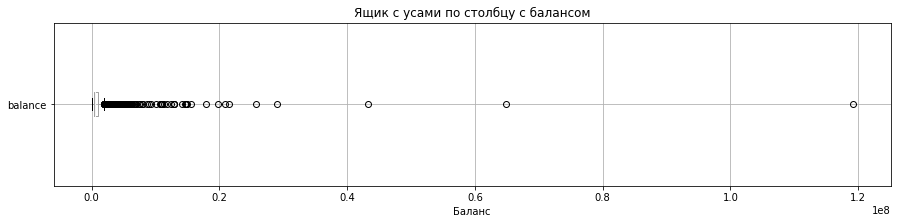

In [23]:
df.boxplot(column='balance', figsize=(15,3), vert=False)
plt.title('Ящик с усами по столбцу с балансом')
plt.xlabel('Баланс')
plt.show;

Из боксплота с зарплатой мы можем увидеть, значения, которые сильно выбиваются относительно других, чтобы они не исказили результат при дальнейшем исследовании, добавим их в другой датасет и в дальнейшем исследовании будем смотреть на два этих датасета, в основном оставим зарплату меньше 75 перцентиля.

In [24]:
df['balance'].quantile(q=.75)

980705.85

Выделим вип-сегмент, пользователей, у которы баланс больше 75 перцентеля, то есть 980705.85 рублей 

In [25]:
df_vip = df[df['balance'] >= df['balance'].quantile(q=.75)]

In [26]:
df_vip

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
15,120260,731.0,Рыбинск,М,42.0,3,1480548.47,3,1,0,160974.43,0
18,136651,876.0,Ярославль,М,40.0,5,2307947.36,2,0,0,287010.61,0
20,114192,772.0,Ростов,М,43.0,3,1315511.65,2,0,0,143935.71,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9962,217489,893.0,Ярославль,Ж,49.0,5,1571192.11,4,1,1,151217.99,1
9963,187204,957.0,Ярославль,М,35.0,4,3431029.03,4,1,0,354987.43,1
9977,158143,807.0,Ростов,М,43.0,4,1124809.48,1,1,1,185230.60,1
9986,152986,822.0,Ярославль,М,58.0,5,1434857.91,2,0,1,83442.41,1


In [27]:
df

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0


In [28]:
df_vip['index1'] = df_vip.index
df_vip_index = df_vip['index1']
df['index2'] = df.index
df = df.join(df_vip_index, how="outer")
df = df.loc[df['index2'] != df['index1']]

/tmp/ipykernel_107/2365732187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vip['index1'] = df_vip.index


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         8072 non-null   int64  
 1   score          8072 non-null   float64
 2   city           8072 non-null   object 
 3   gender         8072 non-null   object 
 4   age            8049 non-null   float64
 5   equity         8072 non-null   int64  
 6   balance        5778 non-null   float64
 7   products       8072 non-null   int64  
 8   credit_card    8072 non-null   int64  
 9   last_activity  8072 non-null   int64  
 10  est_salary     8072 non-null   float64
 11  churn          8072 non-null   int64  
 12  index2         8072 non-null   int64  
 13  index1         0 non-null      float64
dtypes: float64(5), int64(7), object(2)
memory usage: 945.9+ KB


In [30]:
df_vip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 3 to 9999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         1927 non-null   int64  
 1   score          1927 non-null   float64
 2   city           1927 non-null   object 
 3   gender         1927 non-null   object 
 4   age            1924 non-null   float64
 5   equity         1927 non-null   int64  
 6   balance        1927 non-null   float64
 7   products       1927 non-null   int64  
 8   credit_card    1927 non-null   int64  
 9   last_activity  1927 non-null   int64  
 10  est_salary     1927 non-null   float64
 11  churn          1927 non-null   int64  
 12  index1         1927 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 275.3+ KB


Данные не потеряли, суммарно также 10000 клиентов

Посмотрим на боксплот, среднее и медиану, стали ли они меньше отличаться и пропали выбросы с боксплота

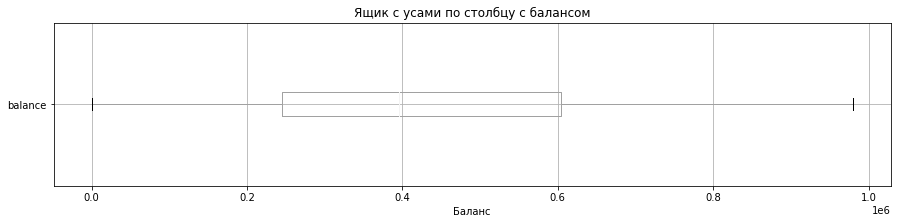

In [31]:
df.boxplot(column='balance', figsize=(15,3), vert=False)
plt.title('Ящик с усами по столбцу с балансом')
plt.xlabel('Баланс')
plt.show;

In [32]:
df.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,index2,index1
count,8072.000000,8072.000000,8049.000000,8072.000000,5778.000000,8072.000000,8072.000000,8072.000000,8.072000e+03,8072.000000,8072.000000,0.0
mean,171496.986125,842.225347,42.058765,2.261397,432357.342110,1.759415,0.718162,0.523043,1.398317e+05,0.133920,4989.804881,NaN
std,33418.789027,65.946037,12.250995,1.972693,242723.217379,0.739255,0.449923,0.499500,1.318596e+05,0.340587,2888.934298,NaN
min,94561.000000,642.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.546300e+03,0.000000,0.000000,NaN
25%,142473.500000,796.000000,33.000000,0.000000,245594.947500,1.000000,0.000000,0.000000,7.085451e+04,0.000000,2487.750000,NaN
50%,172136.500000,845.000000,39.000000,2.000000,395588.275000,2.000000,1.000000,1.000000,1.130002e+05,0.000000,4968.500000,NaN
75%,200850.750000,894.000000,50.000000,4.000000,603939.207500,2.000000,1.000000,1.000000,1.675049e+05,0.000000,7490.250000,NaN
max,229145.000000,999.000000,86.000000,9.000000,979396.580000,5.000000,1.000000,1.000000,1.333687e+06,1.000000,9998.000000,NaN


### Добавим новые столбцы с бинарным разделением по городам

In [33]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

У нас есть три города в датасете, для дальнейшей работы и построение корреляции, нам нужно разделить их с помощью бинарного разделения. Напишем функцию

In [34]:
def city_def(row):
    
    if row['city'] == 'Рыбинск':
        row['Рыбинск'] = 1
    elif row['city'] == 'Ярославль':
        row['Ярославль'] = 1
    else:
        row['Ростов'] = 1
    return row

In [35]:
df = df.apply(city_def,axis=1)

Заполним пропуски нулями и приведем к типу int

In [36]:
df['Ростов'] = df['Ростов'].fillna(0).astype(int)
df['Ярославль'] = df['Ярославль'].fillna(0).astype(int)
df['Рыбинск'] = df['Рыбинск'].fillna(0).astype(int)

In [37]:
df.head(5)

,age,balance,churn,city,credit_card,equity,est_salary,gender,index1,index2,last_activity,products,score,userid,Ростов,Рыбинск,Ярославль
0,25.0,59214.82,1,Рыбинск,0,1,75719.14,Ж,NaN,0,1,2,850.0,183012,0,1,0
1,37.0,850594.33,0,Рыбинск,1,5,86621.77,Ж,NaN,1,0,3,861.0,146556,0,1,0
2,30.0,NaN,0,Рыбинск,1,0,107683.34,Ж,NaN,2,1,1,892.0,120722,0,1,0
4,34.0,174.00,1,Ярославль,1,5,67353.16,М,NaN,4,0,1,730.0,157978,0,0,1
5,56.0,863687.24,0,Рыбинск,1,4,156619.80,М,NaN,5,0,3,856.0,202305,0,1,0


Успешно провели бинарное разделение для городов

### Добавим новые столбцы с бинарным разделением по количеству использованию продуктов

In [38]:
df['products'].unique()

array([2, 3, 1, 4, 5])

Можем увидеть, что максимум можно использовать 5 продуктов, проведем бинарное разделение.

In [39]:
def product_def(row):
    
    if row['products'] == 1:
        row['product_1'] = 1
    elif row['products'] == 2:
        row['product_2'] = 1
    elif row['products'] == 3:
        row['product_3'] = 1
    elif row['products'] == 4:
        row['product_4'] = 1
    else:
        row['product_5'] = 1
    return row

In [40]:
df = df.apply(product_def,axis=1)

In [41]:
# заполним пропуски в этих столбцах нулями
df['product_1'] = df['product_1'].fillna(0).astype(int)
df['product_2'] = df['product_2'].fillna(0).astype(int)
df['product_3'] = df['product_3'].fillna(0).astype(int)
df['product_4'] = df['product_4'].fillna(0).astype(int)
df['product_5'] = df['product_5'].fillna(0).astype(int)

In [42]:
df.head()

,age,balance,churn,city,credit_card,equity,est_salary,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,userid,Ростов,Рыбинск,Ярославль
0,25.0,59214.82,1,Рыбинск,0,1,75719.14,Ж,NaN,0,1,0,1,0,0,0,2,850.0,183012,0,1,0
1,37.0,850594.33,0,Рыбинск,1,5,86621.77,Ж,NaN,1,0,0,0,1,0,0,3,861.0,146556,0,1,0
2,30.0,NaN,0,Рыбинск,1,0,107683.34,Ж,NaN,2,1,1,0,0,0,0,1,892.0,120722,0,1,0
4,34.0,174.00,1,Ярославль,1,5,67353.16,М,NaN,4,0,1,0,0,0,0,1,730.0,157978,0,0,1
5,56.0,863687.24,0,Рыбинск,1,4,156619.80,М,NaN,5,0,0,0,1,0,0,3,856.0,202305,0,1,0


Можем увидеть, что провели все успешно, теперь у нас есть разделение по продуктам и городам.

### Добавим столбец с категорией разделением заработка по доходу

In [43]:
df['est_salary'].describe()

count    8.072000e+03
mean     1.398317e+05
std      1.318596e+05
min      2.546300e+03
25%      7.085451e+04
50%      1.130002e+05
75%      1.675049e+05
max      1.333687e+06
Name: est_salary, dtype: float64

Если посмотреть по описанию столбца est_salary, то можем увидеть 25,50,75 персенты, по ним проведем категоризацию, только добавим еще одну категорию "Очень высокая", которая будет содержать небольшой процент клиентов, но эти клиенты одни из самых важных, так как они могут принести больше всех денег, на боксплоте они считаются выбросами, зарплата выше 270 000 рублей. Тогда:\
1 категория: зарплата <= 67 532 руб\
2 категория : 67 532 руб < зарплата <= 106 150 руб\
3 категория: 106 150 руб < зарплата <= 154 960 руб\
4 категория: 154 960 руб < зарплата <= 270 000 руб\
5 категория: 270 000руб < зарплата 

In [44]:
# Напишем функцию для категоризации
def salary_def(row):
    
    if row['est_salary'] <= 67532:
        row['est_salary_1'] = 1
        row['cat_salary'] = '1 категория'
    elif row['est_salary'] > 67532 and row['est_salary'] <= 106150:
        row['est_salary_2'] = 1
        row['cat_salary'] = '2 категория'
    elif row['est_salary'] > 106150 and row['est_salary'] <= 154960:
        row['est_salary_3'] = 1
        row['cat_salary'] = '3 категория'
    elif row['est_salary'] > 154960 and row['est_salary'] <= 270000:
        row['est_salary_4'] = 1
        row['cat_salary'] = '4 категория'
    else:
        row['cat_salary'] = '5 категория'
        row['est_salary_5'] = 1
    return row

In [45]:
df = df.apply(salary_def,axis=1)

In [46]:
# заполним пропуски в этих столбцах нулями
df['est_salary_1'] = df['est_salary_1'].fillna(0).astype(int)
df['est_salary_2'] = df['est_salary_2'].fillna(0).astype(int)
df['est_salary_3'] = df['est_salary_3'].fillna(0).astype(int)
df['est_salary_4'] = df['est_salary_4'].fillna(0).astype(int)
df['est_salary_5'] = df['est_salary_5'].fillna(0).astype(int)

In [47]:
df.head()

,age,balance,cat_salary,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,userid,Ростов,Рыбинск,Ярославль
0,25.0,59214.82,2 категория,1,Рыбинск,0,1,75719.14,0,1,0,0,0,Ж,NaN,0,1,0,1,0,0,0,2,850.0,183012,0,1,0
1,37.0,850594.33,2 категория,0,Рыбинск,1,5,86621.77,0,1,0,0,0,Ж,NaN,1,0,0,0,1,0,0,3,861.0,146556,0,1,0
2,30.0,NaN,3 категория,0,Рыбинск,1,0,107683.34,0,0,1,0,0,Ж,NaN,2,1,1,0,0,0,0,1,892.0,120722,0,1,0
4,34.0,174.00,1 категория,1,Ярославль,1,5,67353.16,1,0,0,0,0,М,NaN,4,0,1,0,0,0,0,1,730.0,157978,0,0,1
5,56.0,863687.24,4 категория,0,Рыбинск,1,4,156619.80,0,0,0,1,0,М,NaN,5,0,0,0,1,0,0,3,856.0,202305,0,1,0


Успешно добавили новый столбец с категориями по зарплате

**Добавим для вип-сегмента**

In [48]:
df_vip = df_vip.apply(salary_def,axis=1)

In [49]:
# заполним пропуски в этих столбцах нулями
df_vip['est_salary_1'] = df_vip['est_salary_1'].fillna(0).astype(int)
df_vip['est_salary_2'] = df_vip['est_salary_2'].fillna(0).astype(int)
df_vip['est_salary_3'] = df_vip['est_salary_3'].fillna(0).astype(int)
df_vip['est_salary_4'] = df_vip['est_salary_4'].fillna(0).astype(int)
df_vip['est_salary_5'] = df_vip['est_salary_5'].fillna(0).astype(int)

In [50]:
df_vip

,age,balance,cat_salary,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,last_activity,products,score,userid
3,51.0,1524746.26,4 категория,1,Ярославль,0,5,174423.53,0,0,0,1,0,Ж,3,1,2,866.0,225363
8,54.0,1206337.87,4 категория,0,Ярославль,1,5,155371.79,0,0,0,1,0,М,8,0,2,923.0,211686
15,42.0,1480548.47,4 категория,0,Рыбинск,1,3,160974.43,0,0,0,1,0,М,15,0,3,731.0,120260
18,40.0,2307947.36,5 категория,0,Ярославль,0,5,287010.61,0,0,0,0,1,М,18,0,2,876.0,136651
20,43.0,1315511.65,3 категория,0,Ростов,0,3,143935.71,0,0,1,0,0,М,20,0,2,772.0,114192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,49.0,1571192.11,3 категория,1,Ярославль,1,5,151217.99,0,0,1,0,0,Ж,9962,1,4,893.0,217489
9963,35.0,3431029.03,5 категория,1,Ярославль,1,4,354987.43,0,0,0,0,1,М,9963,0,4,957.0,187204
9977,43.0,1124809.48,4 категория,1,Ростов,1,4,185230.60,0,0,0,1,0,М,9977,1,1,807.0,158143
9986,58.0,1434857.91,2 категория,1,Ярославль,0,5,83442.41,0,1,0,0,0,М,9986,1,2,822.0,152986


Успешно добавили

### Добавим столбец с категорией разделением по баллам кредитного скоринга

Чтобы выделить категории по балллам кредитного скоринга, воспользуемся нормализованной гистограммой

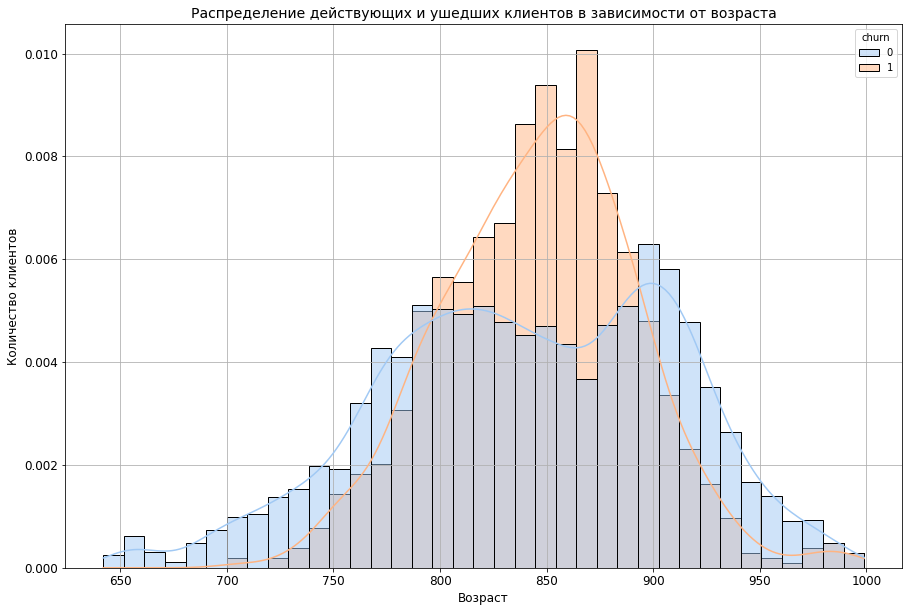

In [51]:
plt.figure(figsize=(15, 10))
sns.histplot(x='score', hue='churn', data=df, kde=True, stat="density", common_norm=False)
plt.title('Распределение действующих и ушедших клиентов в зависимости от возраста', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Возраст', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.show()

Из гистограммы видим два пика, у оставшихся клиентов пик приходит на 900, и немного меньше пик на 800. У ушедших пик приходится на 875 баллов.\
Категоризируем, нулевая категория 0-595, первая категория 596 - 820, вторая 821- 875, третья 876-940, 941 - 1000

Сделаем разделение баллов кредитного скоринга

In [52]:
# Напишем функцию для категоризации по баллам
def score_def(row):
    
    if row['score'] <= 595:
        row['cat_score'] = '1 категория_595'
        #row['score_1'] = 1
    elif row['score'] > 595 and row['score'] <= 820:
        row['cat_score'] = '2 категория_596_820'
        row['score_2'] = 1
    elif row['score'] > 820 and row['score'] <= 875:
        row['cat_score'] = '3 категория_821_875'
        row['score_3'] = 1
    elif row['score'] > 875 and row['score'] <= 940:
        row['cat_score'] = '4 категория_876_940'
        row['score_4'] = 1
    else:
        row['cat_score'] = '5 категория_941_1000'
        row['score_5'] = 1
    return row

In [53]:
df = df.apply(score_def,axis=1)

In [54]:
# заполним пропуски в этих столбцах нулями
#df['score_1'] = df['score_1'].fillna(0).astype(int)
df['score_2'] = df['score_2'].fillna(0).astype(int)
df['score_3'] = df['score_3'].fillna(0).astype(int)
df['score_4'] = df['score_4'].fillna(0).astype(int)
df['score_5'] = df['score_5'].fillna(0).astype(int)

In [55]:
df.head()

,age,balance,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,score_2,score_3,score_4,score_5,userid,Ростов,Рыбинск,Ярославль
0,25.0,59214.82,2 категория,3 категория_821_875,1,Рыбинск,0,1,75719.14,0,1,0,0,0,Ж,NaN,0,1,0,1,0,0,0,2,850.0,0,1,0,0,183012,0,1,0
1,37.0,850594.33,2 категория,3 категория_821_875,0,Рыбинск,1,5,86621.77,0,1,0,0,0,Ж,NaN,1,0,0,0,1,0,0,3,861.0,0,1,0,0,146556,0,1,0
2,30.0,NaN,3 категория,4 категория_876_940,0,Рыбинск,1,0,107683.34,0,0,1,0,0,Ж,NaN,2,1,1,0,0,0,0,1,892.0,0,0,1,0,120722,0,1,0
4,34.0,174.00,1 категория,2 категория_596_820,1,Ярославль,1,5,67353.16,1,0,0,0,0,М,NaN,4,0,1,0,0,0,0,1,730.0,1,0,0,0,157978,0,0,1
5,56.0,863687.24,4 категория,3 категория_821_875,0,Рыбинск,1,4,156619.80,0,0,0,1,0,М,NaN,5,0,0,0,1,0,0,3,856.0,0,1,0,0,202305,0,1,0


**Добавим для вип-сегмента**

In [56]:
df_vip = df_vip.apply(score_def,axis=1)

In [57]:
# заполним пропуски в этих столбцах нулями
#df['score_1'] = df['score_1'].fillna(0).astype(int)
df_vip['score_2'] = df_vip['score_2'].fillna(0).astype(int)
df_vip['score_3'] = df_vip['score_3'].fillna(0).astype(int)
df_vip['score_4'] = df_vip['score_4'].fillna(0).astype(int)
df_vip['score_5'] = df_vip['score_5'].fillna(0).astype(int)

In [58]:
df_vip.head()

,age,balance,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,last_activity,products,score,score_2,score_3,score_4,score_5,userid
3,51.0,1524746.26,4 категория,3 категория_821_875,1,Ярославль,0,5,174423.53,0,0,0,1,0,Ж,3,1,2,866.0,0,1,0,0,225363
8,54.0,1206337.87,4 категория,4 категория_876_940,0,Ярославль,1,5,155371.79,0,0,0,1,0,М,8,0,2,923.0,0,0,1,0,211686
15,42.0,1480548.47,4 категория,2 категория_596_820,0,Рыбинск,1,3,160974.43,0,0,0,1,0,М,15,0,3,731.0,1,0,0,0,120260
18,40.0,2307947.36,5 категория,4 категория_876_940,0,Ярославль,0,5,287010.61,0,0,0,0,1,М,18,0,2,876.0,0,0,1,0,136651
20,43.0,1315511.65,3 категория,2 категория_596_820,0,Ростов,0,3,143935.71,0,0,1,0,0,М,20,0,2,772.0,1,0,0,0,114192


### Добавим столбец с категорией разделением по возрасту

Чтобы выделить категории по возрасту, воспользуемся нормализованной гистограммой

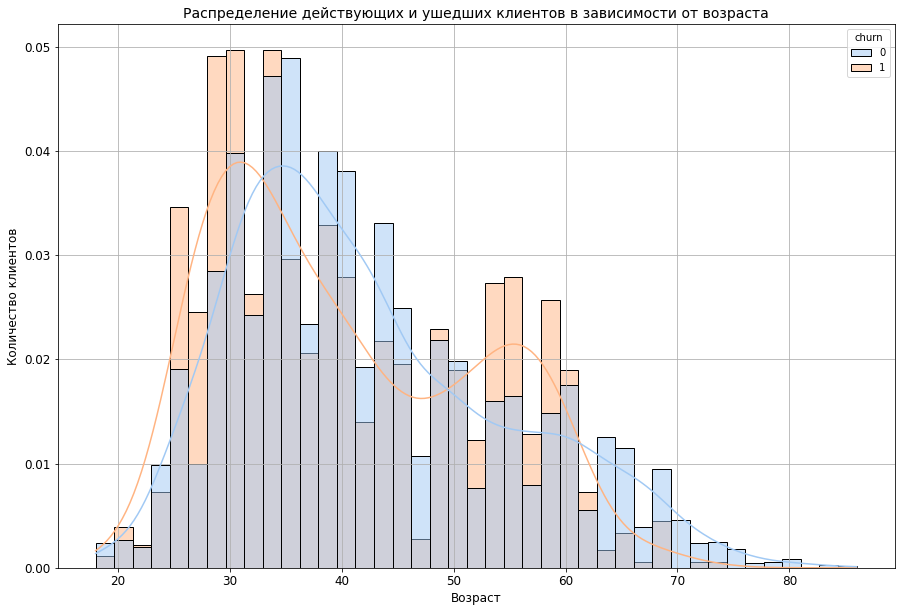

In [59]:
plt.figure(figsize=(15, 10))
sns.histplot(x='age', hue='churn', data=df, kde=True, stat="density", common_norm=False)
plt.title('Распределение действующих и ушедших клиентов в зависимости от возраста', fontsize=14)
plt.ylabel('Количество клиентов', fontsize=12)
plt.xlabel('Возраст', fontsize=12)
plt.tick_params(labelsize=12)
plt.grid(True)
plt.show()

Из полученной гистограммы видно, что пик действующий клиентов приходится на 30-45 лет, пик ушедших клиентов приходится 25-40. Также присутсвует еще один пик, но меньше, для действующих 50-65 для ушедших клиентов 50-60 лет.\
Категоризируем клиентов так, 18-35 1 категория, 36-48 2 категория, 48-60 3 категория , 61-85 4 категория

In [60]:
# Напишем функцию для категоризации по возрасту
def age_def(row):
    
    if row['age'] >= 18 and row['age'] <= 35:
        row['cat_age'] = '1 категория_18-35'
        row['age_1'] = 1
    elif row['age'] > 35 and row['age'] <= 48:
        row['cat_age'] = '2 категория_36-48'
        row['age_2'] = 1
    elif row['age'] > 48 and row['age'] <= 60:
        row['cat_age'] = '3 категория_49-60'
        row['age_3'] = 1
    elif row['age'] > 60 and row['age'] <= 85:
        row['cat_age'] = '4 категория_61-85'
        row['age_4'] = 1
    else:
        row['cat_age'] = '-'
        row['age_5'] = 1
    return row

In [61]:
df = df.apply(age_def,axis=1)

Успешно добавили новый столбец с разделением по возрасту

In [62]:
# заполним пропуски в этих столбцах нулями
df['age_1'] = df['age_1'].fillna(0).astype(int)
df['age_2'] = df['age_2'].fillna(0).astype(int)
df['age_3'] = df['age_3'].fillna(0).astype(int)
df['age_4'] = df['age_4'].fillna(0).astype(int)
df['age_5'] = df['age_5'].fillna(0).astype(int)

In [63]:
df.head()

,age,age_1,age_2,age_3,age_4,age_5,balance,cat_age,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,score_2,score_3,score_4,score_5,userid,Ростов,Рыбинск,Ярославль
0,25.0,1,0,0,0,0,59214.82,1 категория_18-35,2 категория,3 категория_821_875,1,Рыбинск,0,1,75719.14,0,1,0,0,0,Ж,NaN,0,1,0,1,0,0,0,2,850.0,0,1,0,0,183012,0,1,0
1,37.0,0,1,0,0,0,850594.33,2 категория_36-48,2 категория,3 категория_821_875,0,Рыбинск,1,5,86621.77,0,1,0,0,0,Ж,NaN,1,0,0,0,1,0,0,3,861.0,0,1,0,0,146556,0,1,0
2,30.0,1,0,0,0,0,NaN,1 категория_18-35,3 категория,4 категория_876_940,0,Рыбинск,1,0,107683.34,0,0,1,0,0,Ж,NaN,2,1,1,0,0,0,0,1,892.0,0,0,1,0,120722,0,1,0
4,34.0,1,0,0,0,0,174.00,1 категория_18-35,1 категория,2 категория_596_820,1,Ярославль,1,5,67353.16,1,0,0,0,0,М,NaN,4,0,1,0,0,0,0,1,730.0,1,0,0,0,157978,0,0,1
5,56.0,0,0,1,0,0,863687.24,3 категория_49-60,4 категория,3 категория_821_875,0,Рыбинск,1,4,156619.80,0,0,0,1,0,М,NaN,5,0,0,0,1,0,0,3,856.0,0,1,0,0,202305,0,1,0


**Добавим для вип-сегмента**

In [64]:
df_vip = df_vip.apply(age_def,axis=1)

In [65]:
# заполним пропуски в этих столбцах нулями
df_vip['age_1'] = df_vip['age_1'].fillna(0).astype(int)
df_vip['age_2'] = df_vip['age_2'].fillna(0).astype(int)
df_vip['age_3'] = df_vip['age_3'].fillna(0).astype(int)
df_vip['age_4'] = df_vip['age_4'].fillna(0).astype(int)
df_vip['age_5'] = df_vip['age_5'].fillna(0).astype(int)

In [66]:
df_vip.head()

,age,age_1,age_2,age_3,age_4,age_5,balance,cat_age,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,last_activity,products,score,score_2,score_3,score_4,score_5,userid
3,51.0,0,0,1,0,0,1524746.26,3 категория_49-60,4 категория,3 категория_821_875,1,Ярославль,0,5,174423.53,0,0,0,1,0,Ж,3,1,2,866.0,0,1,0,0,225363
8,54.0,0,0,1,0,0,1206337.87,3 категория_49-60,4 категория,4 категория_876_940,0,Ярославль,1,5,155371.79,0,0,0,1,0,М,8,0,2,923.0,0,0,1,0,211686
15,42.0,0,1,0,0,0,1480548.47,2 категория_36-48,4 категория,2 категория_596_820,0,Рыбинск,1,3,160974.43,0,0,0,1,0,М,15,0,3,731.0,1,0,0,0,120260
18,40.0,0,1,0,0,0,2307947.36,2 категория_36-48,5 категория,4 категория_876_940,0,Ярославль,0,5,287010.61,0,0,0,0,1,М,18,0,2,876.0,0,0,1,0,136651
20,43.0,0,1,0,0,0,1315511.65,2 категория_36-48,3 категория,2 категория_596_820,0,Ростов,0,3,143935.71,0,0,1,0,0,М,20,0,2,772.0,1,0,0,0,114192


### Добавим столбец с категорией разделением по полу

In [67]:
# Напишем функцию для разделение по полу
def gender_def(row):
    
    if row['gender'] == 'М':
        row['M'] = 1
    elif row['gender'] == 'Ж':
        row['W'] = 1
    return row

In [68]:
df = df.apply(gender_def,axis=1)

In [69]:
# заполним пропуски в этих столбцах нулями
df['M'] = df['M'].fillna(0).astype(int)
df['W'] = df['W'].fillna(0).astype(int)

### Вывод

* Поменяли название столбцов
* Проверили на дубликаты
* Проверим на пропуски
* Посмотрели на выбивающиеся значения
* Добавили новые столбцы с бинарным разделением по городам
* Добавили новые столбцы с бинарным разделением по количеству использованию продуктов
* Добавили столбец с категорией разделением заработка по доходу
* Добавили столбец с категорией разделением по баллам кредитного скоринга
* Добавили столбец с категорией разделением по возрасту
* Добавили столбец с категорией разделением по полу

## Исследовательский анализ

### Общая гистограмма

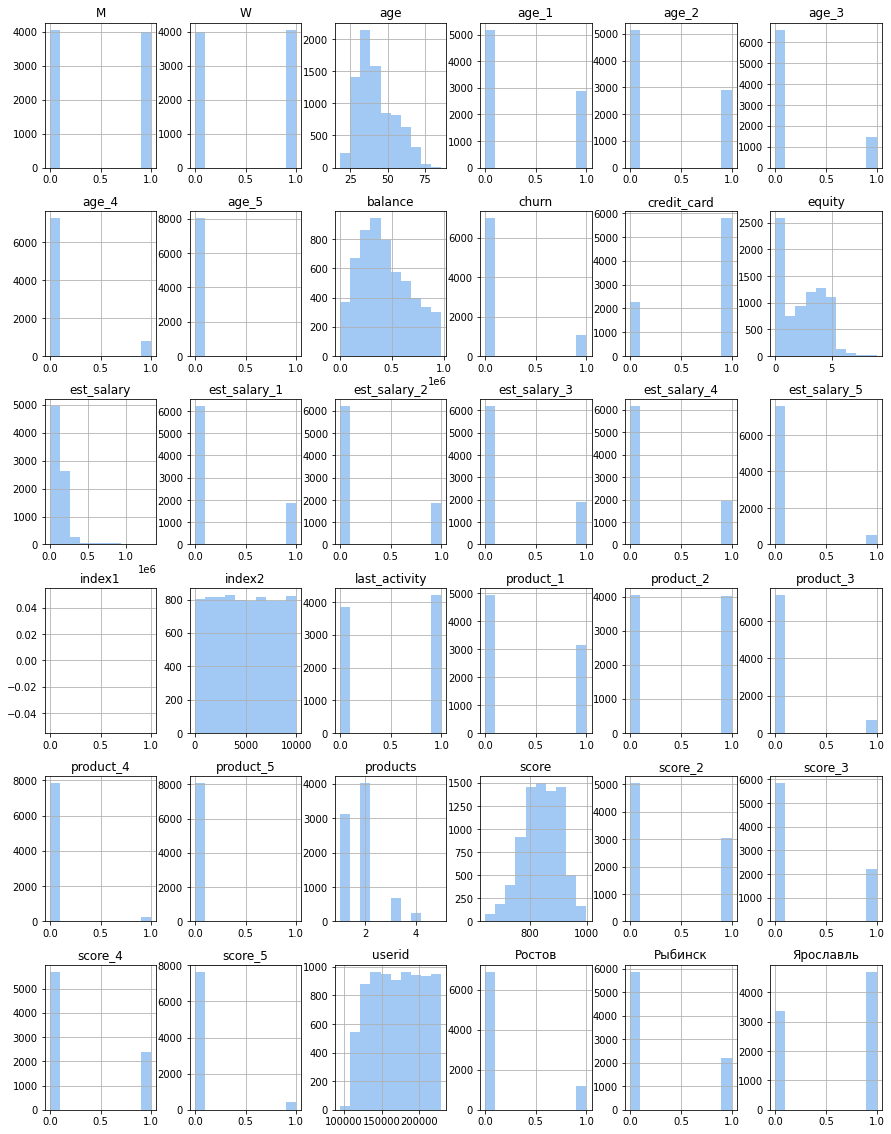

In [70]:
df.hist(figsize=(15, 20))
plt.show();

Проанализируем полученные гистограммы:
* Можем заметить, что больше всего клиентов в банке в возрасте 28-46 лет
* Вполне логично увидеть, что пользователей, которые ушли в раз меньше, относительно пользователей которые остались. Так как если бы ушли, скорее всего банк уже закрылся бы
* Также можем увидеть, что пользователей, которые владеют кредитной картой около 5000, а пользователей, которые не владеют около 2800 клиентов
* Чаще всего владеют 4 или 5 объектами недвижимости
* Столбец last_activity показывает, активен пользователь или нет. Можем увидеть, что активных пользователей, больше, чем неактивных, но отличие небольшие, это опасно, так как данные клиенты находятся в зоне риска, возможно скоро уйдут
* Можем увидеть, клиенты чаще всего используют 2 продукта банка
* Столбец с баллами кредитного скоринга имеют нормальные распределение

### Построим диаграмму с количеством пользователей в каждом городе

In [71]:
count_user = df.pivot_table(index = 'city', values = 'userid', aggfunc = 'count').reset_index()
count_user

,city,userid
0,Ростов,1166
1,Рыбинск,2205
2,Ярославль,4701


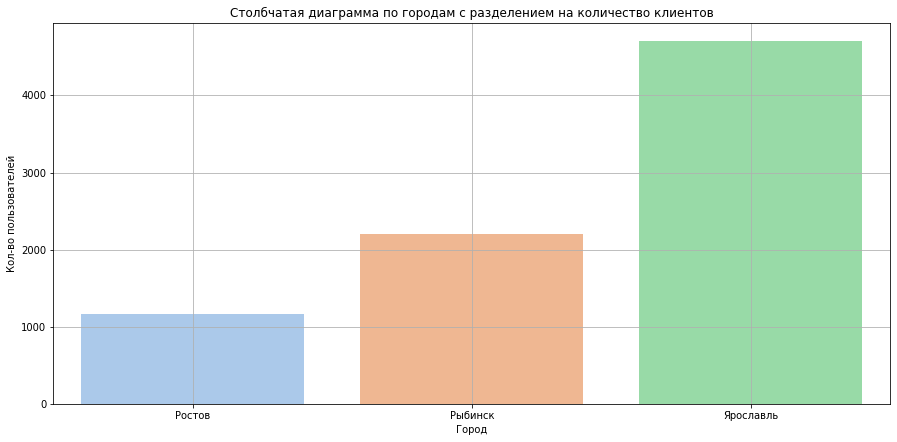

In [72]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='userid', data=count_user)
plt.title('Столбчатая диаграмма по городам с разделением на количество клиентов')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Город')
plt.grid()
plt.show;

Можем увидеть, что клиенты из Ярославля гораздо больше, чем клиентов из других городов

### Построим диаграмму с разделением по городам и продуктам

In [73]:
city_product = df.pivot_table(index = ['city','products'], values = 'userid', aggfunc = 'count').reset_index()
all_city_product = df.pivot_table(index= 'city', values = 'products', aggfunc = 'count').reset_index()
city_product = city_product.merge(all_city_product, how='inner', on='city')
city_product = city_product.rename(columns={"products_x": "Кол-во продуктов", "products_y": "sums", "userid":"count"})
city_product['percent'] = round(city_product['count'] / city_product['sums'] * 100,2)
city_product

,city,Кол-во продуктов,count,sums,percent
0,Ростов,1,407,1166,34.91
1,Ростов,2,652,1166,55.92
2,Ростов,3,64,1166,5.49
3,Ростов,4,39,1166,3.34
4,Ростов,5,4,1166,0.34
5,Рыбинск,1,804,2205,36.46
6,Рыбинск,2,1243,2205,56.37
7,Рыбинск,3,102,2205,4.63
8,Рыбинск,4,56,2205,2.54
9,Ярославль,1,1921,4701,40.86


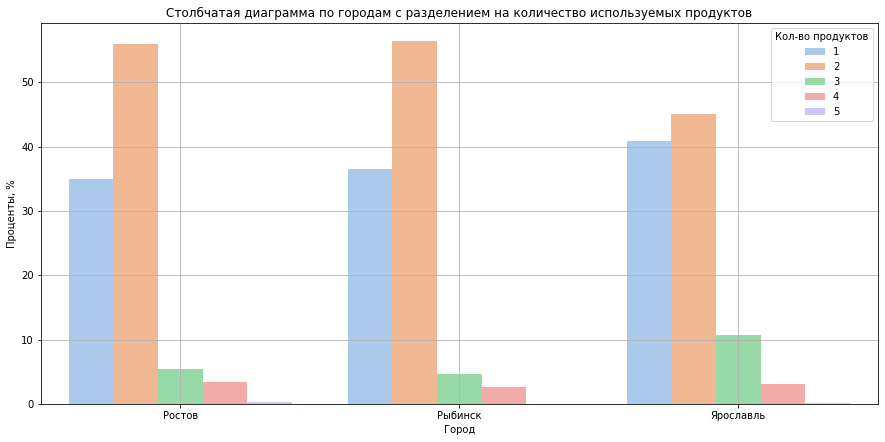

In [74]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='percent',hue='Кол-во продуктов', data=city_product)
plt.title('Столбчатая диаграмма по городам с разделением на количество используемых продуктов')
plt.ylabel('Проценты, %')
plt.xlabel('Город')
plt.grid()
plt.show;

Можем увидеть, что в разных городах чаще всего используют 2 продукта в банке, чуть реже 1 продукт, остальные меньше 5%.\
Кроме Ярославля, там 3 продукта банка используют около 10.7%

### Построим диаграмму с разделением по городам и клиентами, которые ушли

In [75]:
city_churn = df.pivot_table(index = ['city','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_city_churn = df.pivot_table(index= 'city', values = 'churn', aggfunc = 'count').reset_index()
city_churn = city_churn.merge(all_city_churn, how='inner', on='city')
city_churn = city_churn.rename(columns={"churn_y": "all_sum", "userid": "count_city", "churn_x": "Ушел или нет"})
city_churn['percent'] = round(city_churn['count_city'] / city_churn['all_sum'] * 100,2)
city_churn

,city,Ушел или нет,count_city,all_sum,percent
0,Ростов,0,995,1166,85.33
1,Ростов,1,171,1166,14.67
2,Рыбинск,0,1922,2205,87.17
3,Рыбинск,1,283,2205,12.83
4,Ярославль,0,4074,4701,86.66
5,Ярославль,1,627,4701,13.34


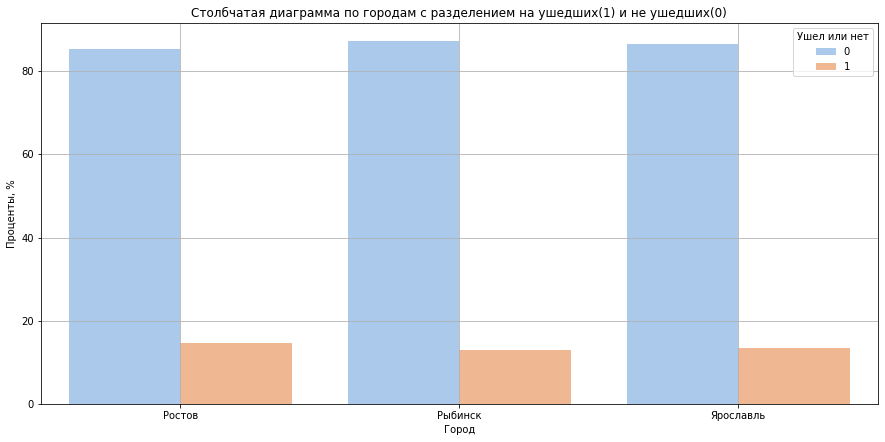

In [76]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='percent',hue='Ушел или нет', data=city_churn)
plt.title('Столбчатая диаграмма по городам с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Город')
plt.grid()
plt.show;

В трех городах клиенты, которые ушли находятся в 12-15%.

### Построим диаграмму с разделением по продуктам и клиентами, которые ушли

In [77]:
products_churn = df.pivot_table(index = ['products','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_products_churn = df.pivot_table(index= 'products', values = 'churn', aggfunc = 'count').reset_index()
products_churn = products_churn.merge(all_products_churn, how='inner', on='products')
products_churn = products_churn.rename(columns={"churn_y": "sums", "userid":"count", "churn_x":"Ушел или нет"})
products_churn['percent'] = round(products_churn['count'] / products_churn['sums'] * 100,2)
products_churn

,products,Ушел или нет,count,sums,percent
0,1,0,2936,3132,93.74
1,1,1,196,3132,6.26
2,2,0,3403,4016,84.74
3,2,1,613,4016,15.26
4,3,0,509,670,75.97
5,3,1,161,670,24.03
6,4,0,132,242,54.55
7,4,1,110,242,45.45
8,5,0,11,12,91.67
9,5,1,1,12,8.33


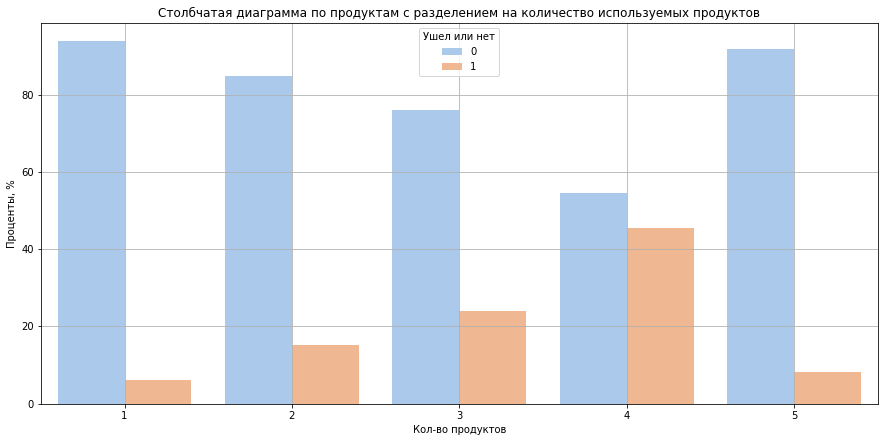

In [78]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='Ушел или нет', data=products_churn)
plt.title('Столбчатая диаграмма по продуктам с разделением на количество используемых продуктов')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во продуктов')
plt.grid()
plt.show;

Можем увидеть, что клиенты, у которых 4 продукта чаще уходят, чем клиенты имеющие меньше или больше продуктов.\
Клиенты, которые используют 4 продукта, частота ухода 45.45%.\
Важно отметить, что клиентов, которые используют 4 или 5 продуктов всего 242 и 12 человек, относительно других групп пользователей их мало.

### Построим диаграмму с разделением по городам и возрасту

In [79]:
city_age = df.pivot_table(index = ['city','cat_age'], values = 'userid', aggfunc = 'count').reset_index()
all_city_age = df.pivot_table(index= 'city', values = 'cat_age', aggfunc = 'count').reset_index()
city_age = city_age.merge(all_city_age, how='inner', on='city')
city_age = city_age.rename(columns={"cat_age_y": "all_sum", "userid": "count", "cat_age_x": "Возраст"})
city_age['percent'] = round(city_age['count'] / city_age['all_sum'] * 100,2)
city_age = city_age.sort_values(by=['city','count'])
city_age

,city,Возраст,count,all_sum,percent
0,Ростов,-,1,1166,0.09
4,Ростов,4 категория_61-85,152,1166,13.04
3,Ростов,3 категория_49-60,253,1166,21.70
1,Ростов,1 категория_18-35,377,1166,32.33
2,Ростов,2 категория_36-48,383,1166,32.85
5,Рыбинск,-,11,2205,0.50
9,Рыбинск,4 категория_61-85,230,2205,10.43
8,Рыбинск,3 категория_49-60,431,2205,19.55
6,Рыбинск,1 категория_18-35,741,2205,33.61
7,Рыбинск,2 категория_36-48,792,2205,35.92


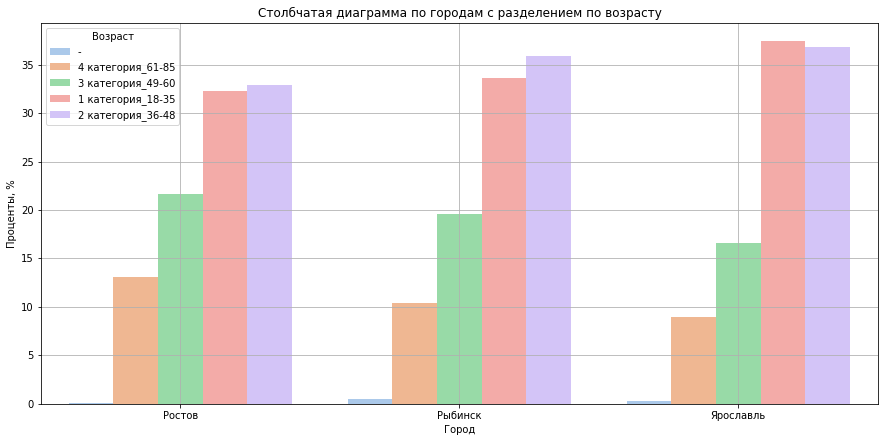

In [80]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='percent',hue='Возраст', data=city_age)
plt.title('Столбчатая диаграмма по городам с разделением по возрасту')
plt.ylabel('Проценты, %')
plt.xlabel('Город')
plt.grid()
plt.show;

Можем увидеть, что в данном датасете преобладают клиенты из 2 категории, то есть 36-48 лет, кроме Ярославля, там на один процент вырвалась категория 18-35 лет\
Следом идет 1 категория, 18-35 лет.\
3 категория, 48-60лет находится третим в списке.\
Из 4 категории, 61-85 лет меньше 14%

### Построим диаграмму с разделением по продуктам и возрасту

In [81]:
products_age = df.pivot_table(index = ['products','cat_age'], values = 'userid', aggfunc = 'count').reset_index()
all_products_age = df.pivot_table(index= 'products', values = 'cat_age', aggfunc = 'count').reset_index()
products_age = products_age.merge(all_products_age, how='inner', on='products')
products_age = products_age.rename(columns={"cat_age_x": "cat_age", "userid": "count", "cat_age_y": "Всего по продукту"})
products_age['percent'] = round(products_age['count'] / products_age['Всего по продукту'] * 100,2)
products_age = products_age.sort_values(by=['products','count'])
products_age.head()

,products,cat_age,count,Всего по продукту,percent
0,1,-,20,3132,0.64
4,1,4 категория_61-85,300,3132,9.58
3,1,3 категория_49-60,519,3132,16.57
1,1,1 категория_18-35,1082,3132,34.55
2,1,2 категория_36-48,1211,3132,38.67


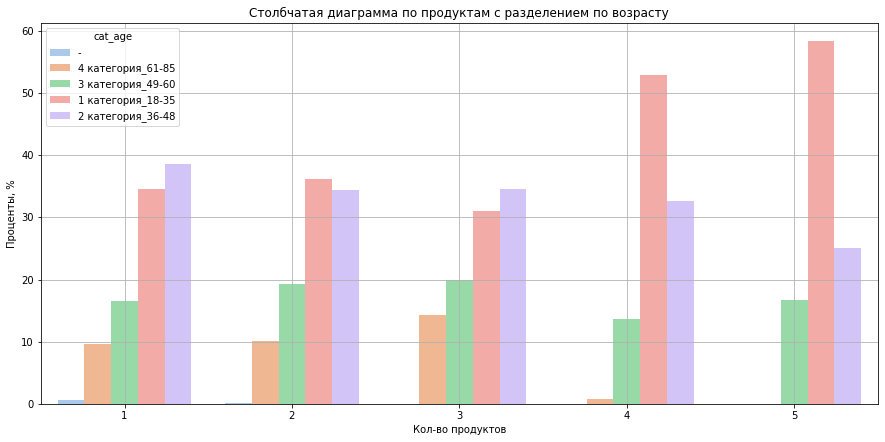

In [82]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='cat_age', data=products_age)
plt.title('Столбчатая диаграмма по продуктам с разделением по возрасту')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во продуктов')
plt.grid()
plt.show;

Смотря на диаграмму, видно, что у клиентов распределение примерно похоже, клиенты с двумя продуктами отличаются тем, что вверх вырвалась категория 18-35 лет, но не сильно. Также видно, что пользователи из категории 61-85 лет чаще всего встречаются в категории с тремя продуктами\
Клиенты из категории 49-60 лет примерно распределены поровну в продуктах 2-3, в 5 продуктов, там не присутствует их

### Построим диаграмму с разделением по возрасту и клиентами, которые ушли

In [83]:
age_churn = df.pivot_table(index = ['cat_age','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_age_churn = df.pivot_table(index= 'cat_age', values = 'userid', aggfunc = 'count').reset_index()
age_churn = age_churn.merge(all_age_churn, how='inner', on='cat_age')
age_churn = age_churn.rename(columns={"userid_y": "all_sum", "userid_x": "count", "cat_age": "Возраст", "churn": "Ушел или нет"})
age_churn['percent'] = round(age_churn['count'] / age_churn['all_sum'] * 100,2)
age_churn = age_churn.sort_values(by='all_sum', ascending=False)
age_churn

,Возраст,Ушел или нет,count,all_sum,percent
4,2 категория_36-48,0,2614,2908,89.89
5,2 категория_36-48,1,294,2908,10.11
2,1 категория_18-35,0,2404,2876,83.59
3,1 категория_18-35,1,472,2876,16.41
6,3 категория_49-60,0,1194,1462,81.67
7,3 категория_49-60,1,268,1462,18.33
8,4 категория_61-85,0,755,801,94.26
9,4 категория_61-85,1,46,801,5.74
0,-,0,24,25,96.00
1,-,1,1,25,4.00


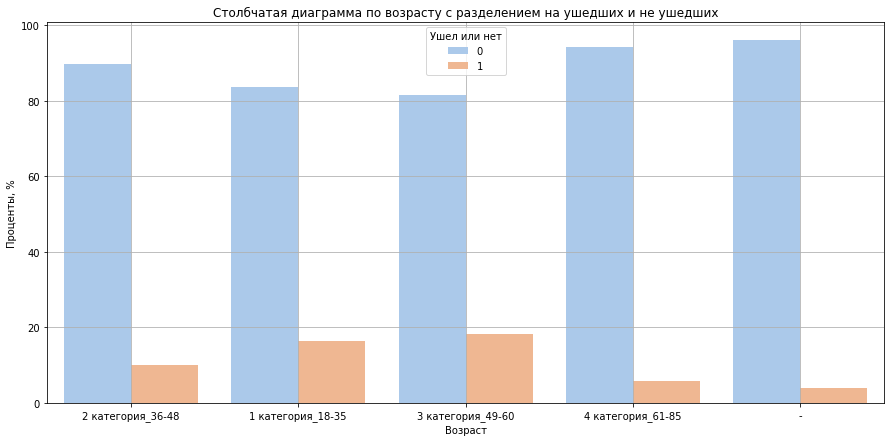

In [84]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='Возраст', y='percent',hue='Ушел или нет', data=age_churn)
plt.title('Столбчатая диаграмма по возрасту с разделением на ушедших и не ушедших')
plt.ylabel('Проценты, %')
plt.xlabel('Возраст')
plt.grid()
plt.show;

Чаще всего уходят пользователи из категории 49-60 лет - 18.33%, 18-35 лет - 16.4%.\
Меньше всего из группы 61-85 лет, 5.74%

### Построим диаграмму с разделением по городам и кредитному скорингу

In [85]:
city_score = df.pivot_table(index = ['city','cat_score'], values = 'userid', aggfunc = 'count').reset_index()
all_city_score = df.pivot_table(index= 'city', values = 'cat_score', aggfunc = 'count').reset_index()
city_score = city_score.merge(all_city_score, how='inner', on='city')
city_score = city_score.rename(columns={"cat_score_y": "all_sum", "userid": "count", "cat_score_x": "Рейтинг"})
city_score['percent'] = round(city_score['count'] / city_score['all_sum'] * 100,2)
city_score

,city,Рейтинг,count,all_sum,percent
0,Ростов,2 категория_596_820,467,1166,40.05
1,Ростов,3 категория_821_875,364,1166,31.22
2,Ростов,4 категория_876_940,284,1166,24.36
3,Ростов,5 категория_941_1000,51,1166,4.37
4,Рыбинск,2 категория_596_820,798,2205,36.19
5,Рыбинск,3 категория_821_875,635,2205,28.80
6,Рыбинск,4 категория_876_940,661,2205,29.98
7,Рыбинск,5 категория_941_1000,111,2205,5.03
8,Ярославль,2 категория_596_820,1766,4701,37.57
9,Ярославль,3 категория_821_875,1235,4701,26.27


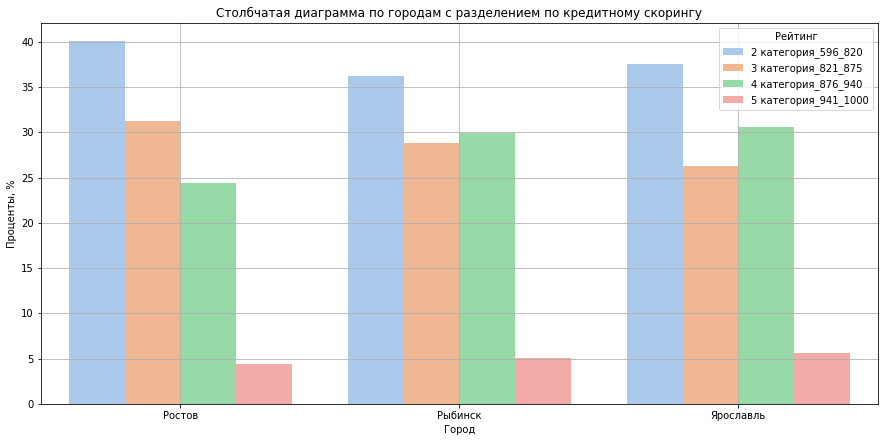

In [86]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='percent',hue='Рейтинг', data=city_score)
plt.title('Столбчатая диаграмма по городам с разделением по кредитному скорингу')
plt.ylabel('Проценты, %')
plt.xlabel('Город')
plt.grid()
plt.show;

Примерно во всех городах одинаковое распределение. Преобладает рейтинг 596-820
В Рыбинске и Ярославле похожее распределение, Ростов немного отличился, третья категория 821-875 баллов выросла, а 876-940 уменьшилось

### Построим диаграмму с разделением по продуктам и кредитному скорингу

In [87]:
products_score = df.pivot_table(index = ['products','cat_score'], values = 'userid', aggfunc = 'count').reset_index()
all_products_score = df.pivot_table(index= 'products', values = 'cat_score', aggfunc = 'count').reset_index()
products_score = products_score.merge(all_products_score, how='inner', on='products')
products_score = products_score.rename(columns={"cat_score_x": "cat_score", "userid": "count", "cat_score_y": "Всего по продукту"})
products_score['percent'] = round(products_score['count'] / products_score['Всего по продукту'] * 100,2)
products_score

,products,cat_score,count,Всего по продукту,percent
0,1,2 категория_596_820,996,3132,31.80
1,1,3 категория_821_875,454,3132,14.50
2,1,4 категория_876_940,1421,3132,45.37
3,1,5 категория_941_1000,261,3132,8.33
4,2,2 категория_596_820,1657,4016,41.26
5,2,3 категория_821_875,1416,4016,35.26
6,2,4 категория_876_940,802,4016,19.97
7,2,5 категория_941_1000,141,4016,3.51
8,3,2 категория_596_820,354,670,52.84
9,3,3 категория_821_875,193,670,28.81


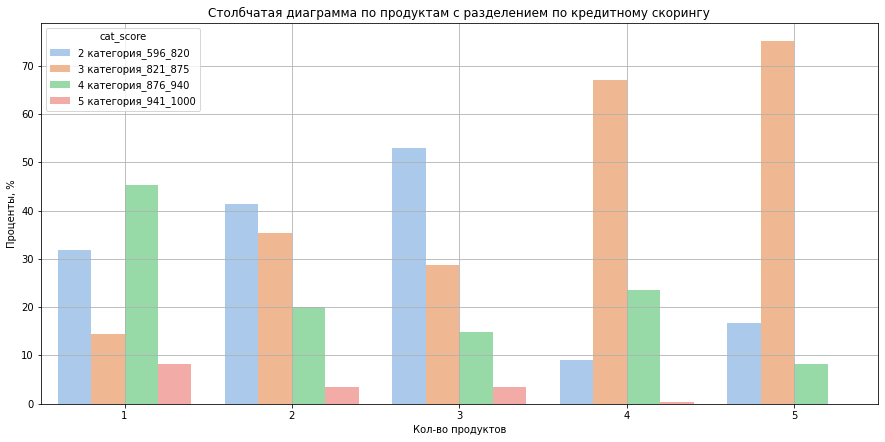

In [88]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='cat_score', data=products_score)
plt.title('Столбчатая диаграмма по продуктам с разделением по кредитному скорингу')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во продуктов')
plt.grid()
plt.show;

Клиенты, использующие один продукт, рейтинг 876-940 баллов в приоритете, относительно других групп\
2 продукта, 596-820 баллов а следом идет 821-875 баллов\
3 продукта, сильно вырывается вверх рейтинг 596-820 баллов\
4 продукта, 821-875 баллов занимает больше 65% всех клиентов, 941-1000 баллов минимален\
5 продуктов, 821-875 баллов больше 75%, отсутсвует 5 категория 941-1000 баллов

### Построим диаграмму с разделением по кредитному скорингу и клиентами, которые ушли

In [89]:
score_churn = df.pivot_table(index = ['cat_score','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_score_churn = df.pivot_table(index= 'cat_score', values = 'churn', aggfunc = 'count').reset_index()
score_churn = score_churn.merge(all_score_churn, how='inner', on='cat_score')
score_churn = score_churn.rename(columns={"churn_y": "all_sum", "userid": "count", "churn_x": "Ушел или нет"})
score_churn['percent'] = round(score_churn['count'] / score_churn['all_sum'] * 100,2)
score_churn

,cat_score,Ушел или нет,count,all_sum,percent
0,2 категория_596_820,0,2732,3031,90.14
1,2 категория_596_820,1,299,3031,9.86
2,3 категория_821_875,0,1730,2234,77.44
3,3 категория_821_875,1,504,2234,22.56
4,4 категория_876_940,0,2125,2381,89.25
5,4 категория_876_940,1,256,2381,10.75
6,5 категория_941_1000,0,404,426,94.84
7,5 категория_941_1000,1,22,426,5.16


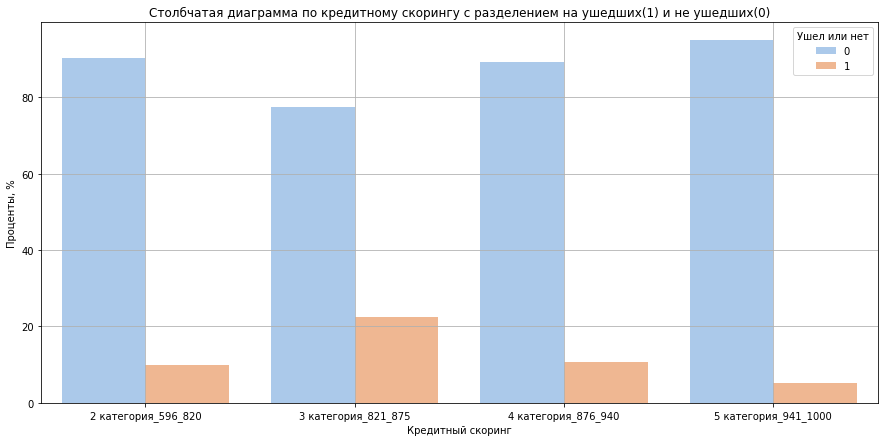

In [90]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='cat_score', y='percent',hue='Ушел или нет', data=score_churn)
plt.title('Столбчатая диаграмма по кредитному скорингу с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Кредитный скоринг')
plt.grid()
plt.show;

Клиенты, имеющие рейтинг 821-875 баллов чаще всего уходят, если смотреть на другие группы рейтинга, их процент составляет 22.56%\
Клиенты с лучшим рейтингом реже всего уходят из банка, их процент составляет 5.16%

### Построим диаграмму с разделением по городам и зарплате

In [91]:
city_salary = df.pivot_table(index = ['city','cat_salary'], values = 'userid', aggfunc = 'count').reset_index()
all_city_salary = df.pivot_table(index= 'city', values = 'cat_salary', aggfunc = 'count').reset_index()
city_salary = city_salary.merge(all_city_salary, how='inner', on='city')
city_salary = city_salary.rename(columns={"cat_salary_y": "all_sum", "userid": "count", "cat_salary_x": "Зарплата"})
city_salary['percent'] = round(city_salary['count'] / city_salary['all_sum'] * 100,2)
city_salary = city_salary.sort_values(by = ['city','all_sum','percent'])
city_salary

,city,Зарплата,count,all_sum,percent
4,Ростов,5 категория,23,1166,1.97
3,Ростов,4 категория,198,1166,16.98
2,Ростов,3 категория,271,1166,23.24
1,Ростов,2 категория,319,1166,27.36
0,Ростов,1 категория,355,1166,30.45
9,Рыбинск,5 категория,116,2205,5.26
8,Рыбинск,4 категория,469,2205,21.27
5,Рыбинск,1 категория,534,2205,24.22
6,Рыбинск,2 категория,536,2205,24.31
7,Рыбинск,3 категория,550,2205,24.94


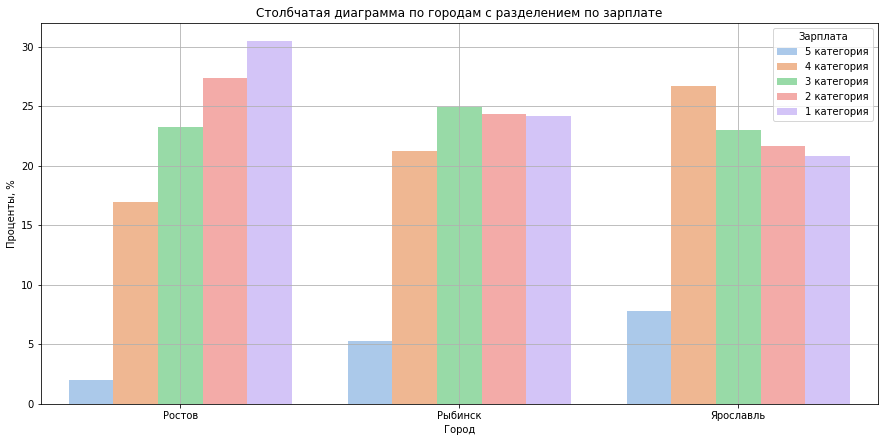

In [92]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='percent',hue='Зарплата', data=city_salary)
plt.title('Столбчатая диаграмма по городам с разделением по зарплате')
plt.ylabel('Проценты, %')
plt.xlabel('Город')
plt.grid()
plt.show;

В Ростове большего всего клиентов с низкой зарплатой, 67 532 рублей и меньше(30.45%), меньше всего зарплата 270 000руб и больше(1.97%)\
В Рыбинске преобладает 3 категория 106 150 руб < зарплата <= 154 960 руб(24.94%), также меньше всего высокая зарпалата(5.26%)\
В Ярославле преобладает 4 категория 154 960 руб < зарплата <= 270 000 руб(26.74%), меньше всего по городу высокая зарплата, но больше, чем в других городах(7.76%)


### Построим диаграмму с разделением по продуктам и зарплате

In [93]:
products_salary = df.pivot_table(index = ['products','cat_salary'], values = 'userid', aggfunc = 'count').reset_index()
all_products_salary = df.pivot_table(index= 'products', values = 'cat_salary', aggfunc = 'count').reset_index()
products_salary = products_salary.merge(all_products_salary, how='inner', on='products')
products_salary = products_salary.rename(columns={"cat_salary_x": "cat_salary", "userid": "count", "cat_salary_y": "Всего по продукту"})
products_salary['percent'] = round(products_salary['count'] / products_salary['Всего по продукту'] * 100,2)
products_salary = products_salary.sort_values(by=['products','count'])
products_salary

,products,cat_salary,count,Всего по продукту,percent
4,1,5 категория,376,3132,12.01
0,1,1 категория,452,3132,14.43
1,1,2 категория,575,3132,18.36
2,1,3 категория,727,3132,23.21
3,1,4 категория,1002,3132,31.99
9,2,5 категория,104,4016,2.59
8,2,4 категория,770,4016,19.17
7,2,3 категория,971,4016,24.18
6,2,2 категория,1060,4016,26.39
5,2,1 категория,1111,4016,27.66


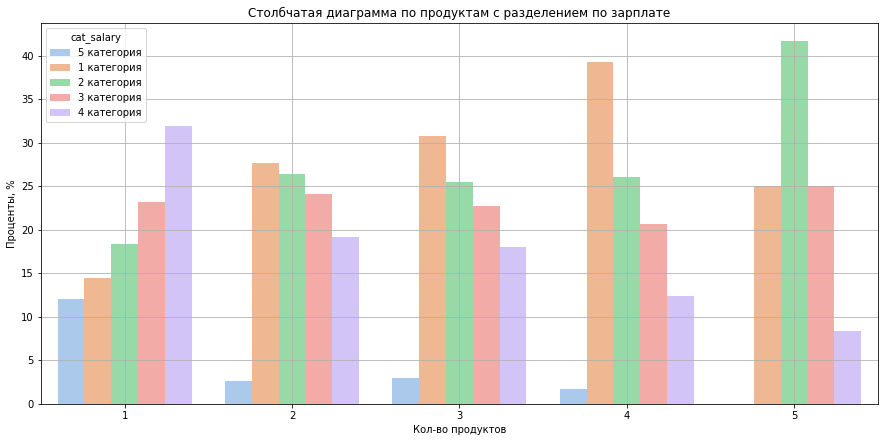

In [94]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='cat_salary', data=products_salary)
plt.title('Столбчатая диаграмма по продуктам с разделением по зарплате')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во продуктов')
plt.grid()
plt.show;

Клиенты, использующие 1 продукт, у них преобладает зарплата из 4 категории, около 31.99%. Также выше, чем в других продуктах,  но наименьшее по продукту зарплата из 5 категории, около 12.01%\ 
Клиенты, использующие 2-3 продукта, имеют примерно одинаковое распределение зарплаты, преобладают зарплаты из категории 1(27.66-30.75%)\
Клиенты, использующие 4 продукта, преобладает зарплата из 1 категории, остальное схоже с 1 и 2 продуктом.\
Клиенты, использующие 5 продуктов, имеют в преимуществе 2 категорию зарплат, около 41.67%. Отсутсвует 5 категория. По 5 продуктам всего 12 пользователей.

### Построим диаграмму с разделением по зарплате и клиентами, которые ушли

In [95]:
salary_churn = df.pivot_table(index = ['cat_salary','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_salary_churn = df.pivot_table(index= 'cat_salary', values = 'churn', aggfunc = 'count').reset_index()
salary_churn = salary_churn.merge(all_salary_churn, how='inner', on='cat_salary')
salary_churn = salary_churn.rename(columns={"churn_y": "all_sum", "userid": "count", "churn_x": "Ушел или нет"})
salary_churn['percent'] = round(salary_churn['count'] / salary_churn['all_sum'] * 100,2)
salary_churn

,cat_salary,Ушел или нет,count,all_sum,percent
0,1 категория,0,1597,1867,85.54
1,1 категория,1,270,1867,14.46
2,2 категория,0,1581,1874,84.36
3,2 категория,1,293,1874,15.64
4,3 категория,0,1616,1903,84.92
5,3 категория,1,287,1903,15.08
6,4 категория,0,1725,1924,89.66
7,4 категория,1,199,1924,10.34
8,5 категория,0,472,504,93.65
9,5 категория,1,32,504,6.35


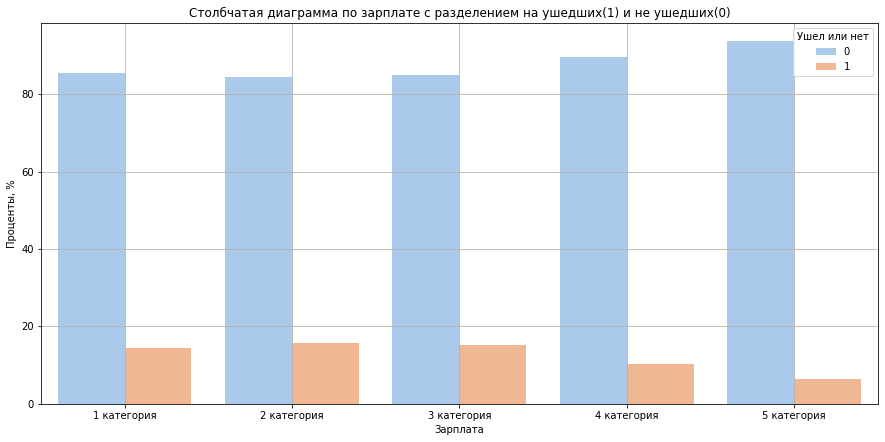

In [96]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='cat_salary', y='percent',hue='Ушел или нет', data=salary_churn)
plt.title('Столбчатая диаграмма по зарплате с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Зарплата')
plt.grid()
plt.show;

Чаще всего уходят пользователи из 1-3 категории, их уход около 14-16%, меньше всего из 5 категории, уход около 6.35%

### Построим диаграмму с разделением по городам и полу

In [97]:
city_gender = df.pivot_table(index = ['city','gender'], values = 'userid', aggfunc = 'count').reset_index()
all_city_gender = df.pivot_table(index= 'city', values = 'gender', aggfunc = 'count').reset_index()
city_gender = city_gender.merge(all_city_gender, how='inner', on='city')
city_gender = city_gender.rename(columns={"gender_y": "all_sum", "userid": "count", "gender_x": "Пол"})
city_gender['percent'] = round(city_gender['count'] / city_gender['all_sum'] * 100,2)
city_gender = city_gender.sort_values(by = ['city','all_sum','percent'])
city_gender

,city,Пол,count,all_sum,percent
1,Ростов,М,556,1166,47.68
0,Ростов,Ж,610,1166,52.32
3,Рыбинск,М,1062,2205,48.16
2,Рыбинск,Ж,1143,2205,51.84
4,Ярославль,Ж,2317,4701,49.29
5,Ярославль,М,2384,4701,50.71


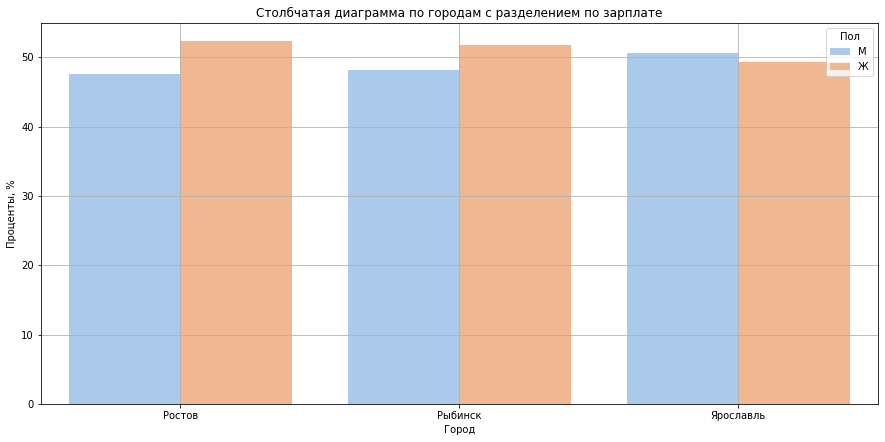

In [98]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='city', y='percent',hue='Пол', data=city_gender)
plt.title('Столбчатая диаграмма по городам с разделением по зарплате')
plt.ylabel('Проценты, %')
plt.xlabel('Город')
plt.grid()
plt.show;

В Ростове и Рыбинке распределение по полу примерно схоже, женщин в банке больше, чем мужчин, но не сильно. 51-52% против 48-49% примерно.\
В Ярославле немного по-другому, мужчин и женщин почти поровну

### Построим диаграмму с разделением по продуктам и полу

In [99]:
products_gender = df.pivot_table(index = ['products','gender'], values = 'userid', aggfunc = 'count').reset_index()
all_products_gender = df.pivot_table(index= 'products', values = 'gender', aggfunc = 'count').reset_index()
products_gender = products_gender.merge(all_products_gender, how='inner', on='products')
products_gender = products_gender.rename(columns={"gender_x": "gender", "userid": "count", "gender_y": "Всего по продукту"})
products_gender['percent'] = round(products_gender['count'] / products_gender['Всего по продукту'] * 100,2)
products_gender

,products,gender,count,Всего по продукту,percent
0,1,Ж,1443,3132,46.07
1,1,М,1689,3132,53.93
2,2,Ж,2153,4016,53.61
3,2,М,1863,4016,46.39
4,3,Ж,381,670,56.87
5,3,М,289,670,43.13
6,4,Ж,87,242,35.95
7,4,М,155,242,64.05
8,5,Ж,6,12,50.00
9,5,М,6,12,50.00


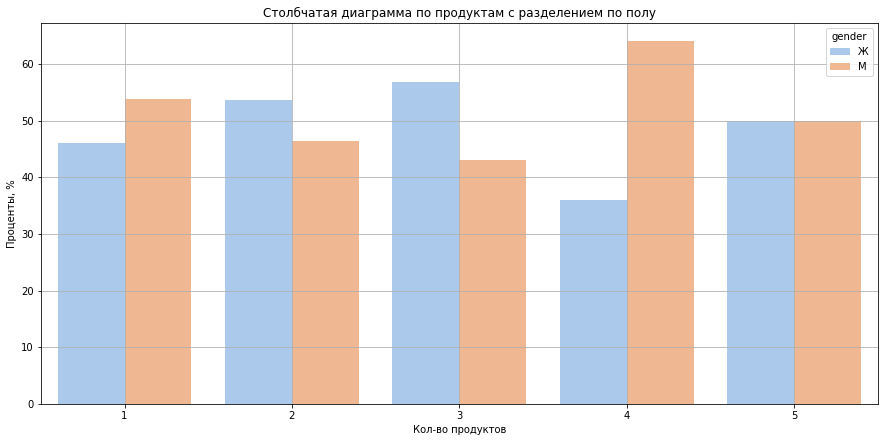

In [100]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='gender', data=products_gender)
plt.title('Столбчатая диаграмма по продуктам с разделением по полу')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во продуктов')
plt.grid()
plt.show;

1 продукт чаще используют мужчины, около 54%\
2 продукта чаще используют женщины, около 54%\
3 продукта чаще используют женщины, около 57%\
4 продукта гораздо чаще используют мужчины, около 64%\
5 продуктов чаще используют мужчины, около 50%

### Построим диаграмму с разделением по полу и клиентами, которые ушли

In [101]:
gender_churn = df.pivot_table(index = ['gender','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_gender_churn = df.pivot_table(index= 'gender', values = 'churn', aggfunc = 'count').reset_index()
gender_churn = gender_churn.merge(all_gender_churn, how='inner', on='gender')
gender_churn = gender_churn.rename(columns={"churn_y": "all_sum", "userid": "count", "churn_x": "Ушел или нет"})
gender_churn['percent'] = round(gender_churn['count'] / gender_churn['all_sum'] * 100,2)
gender_churn

,gender,Ушел или нет,count,all_sum,percent
0,Ж,0,3682,4070,90.47
1,Ж,1,388,4070,9.53
2,М,0,3309,4002,82.68
3,М,1,693,4002,17.32


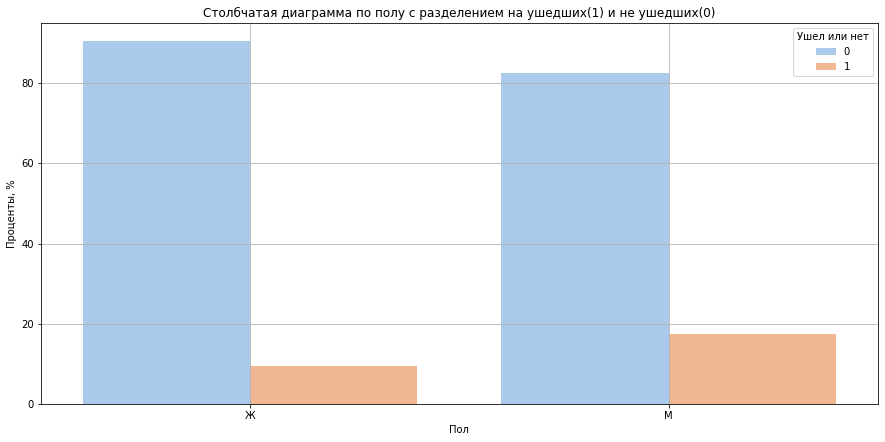

In [102]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='gender', y='percent',hue='Ушел или нет', data=gender_churn)
plt.title('Столбчатая диаграмма по полу с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Пол')
plt.grid()
plt.show;

Женщины реже уходят, чем мужчины из банка, их процент ухода около 9.53%\
Мужчины уходят около 17.32%

### Построим диаграмму с разделением по городам и оценке владеемых объектов

In [103]:
city_equity = df.pivot_table(index = ['city','equity'], values = 'userid', aggfunc = 'count').reset_index()
all_city_equity = df.pivot_table(index= 'city', values = 'equity', aggfunc = 'count').reset_index()
city_equity = city_equity.merge(all_city_equity, how='inner', on='city')
city_equity = city_equity.rename(columns={"equity_y": "all_sum", "userid": "count", "equity_x": "Оценка владеемых объектов"})
city_equity['percent'] = round(city_equity['count'] / city_equity['all_sum'] * 100,2)
city_equity = city_equity.sort_values(by = ['city','all_sum','percent'])
city_equity

,city,Оценка владеемых объектов,count,all_sum,percent
8,Ростов,8,3,1166,0.26
9,Ростов,9,3,1166,0.26
7,Ростов,7,11,1166,0.94
6,Ростов,6,24,1166,2.06
1,Ростов,1,118,1166,10.12
2,Ростов,2,150,1166,12.86
5,Ростов,5,175,1166,15.01
4,Ростов,4,198,1166,16.98
3,Ростов,3,200,1166,17.15
0,Ростов,0,284,1166,24.36


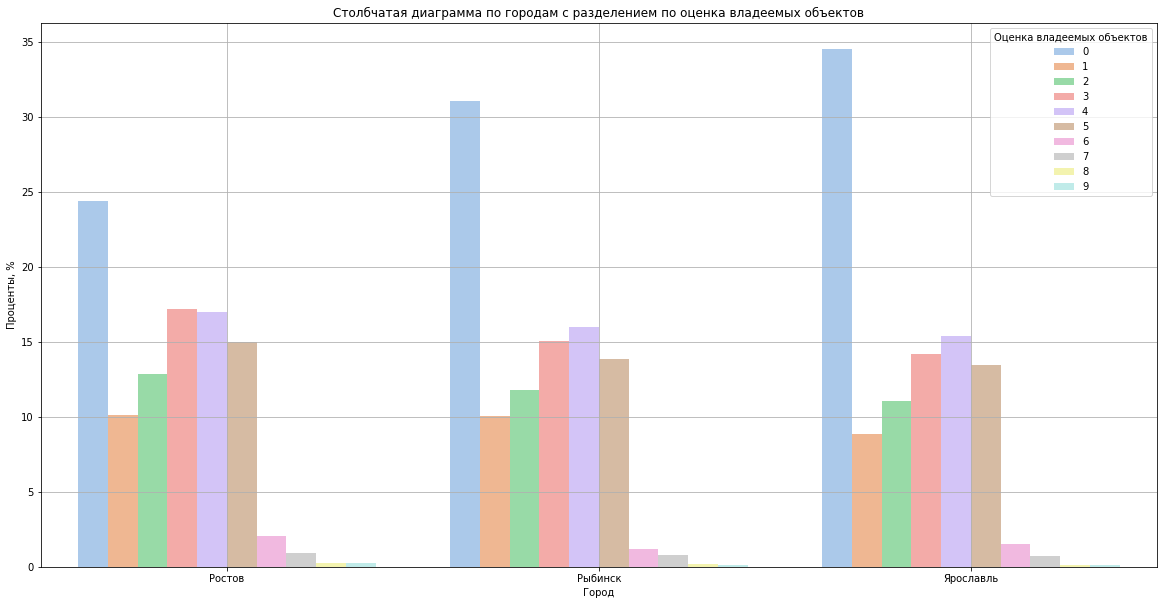

In [104]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x='city', y='percent',hue='Оценка владеемых объектов', data=city_equity)
plt.title('Столбчатая диаграмма по городам с разделением по оценка владеемых объектов')
plt.ylabel('Проценты, %')
plt.xlabel('Город')

plt.grid()
plt.show;

Во данных городах примерно похожее распределение по оценке владеемых объектов. 
Чаще вего по городам встречается оценка 0, Ростове около 24.36%, В Ярославле наибольшая 34.50%
Кроме оценки 0, преобладает оценки 3-5.

### Построим диаграмму с разделением по оценке владеемых объектов и клиентами, которые ушли

In [105]:
equity_churn = df.pivot_table(index = ['equity','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_equity_churn = df.pivot_table(index= 'equity', values = 'churn', aggfunc = 'count').reset_index()
equity_churn = equity_churn.merge(all_equity_churn, how='inner', on='equity')
equity_churn = equity_churn.rename(columns={"churn_y": "all_sum", "userid": "count", "churn_x": "Ушел или нет"})
equity_churn['percent'] = round(equity_churn['count'] / equity_churn['all_sum'] * 100,2)
equity_churn.head(5)

,equity,Ушел или нет,count,all_sum,percent
0,0,0,2502,2590,96.60
1,0,1,88,2590,3.40
2,1,0,666,756,88.10
3,1,1,90,756,11.90
4,2,0,802,930,86.24


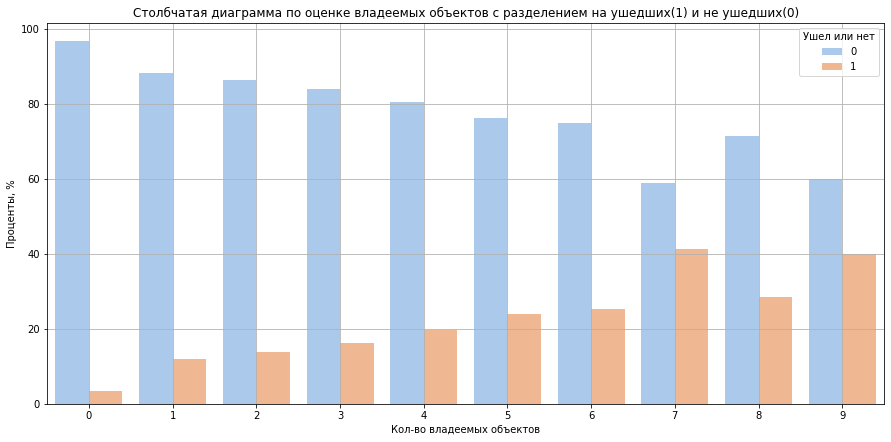

In [106]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='equity', y='percent',hue='Ушел или нет', data=equity_churn)
plt.title('Столбчатая диаграмма по оценке владеемых объектов с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во владеемых объектов')
plt.grid()
plt.show;

Чем выше оценка владеемых объектов, тем чаще уходят из банка. Заметин один провал при владении 8-мью объектами, там уходят реже, чем при владении 7-мью объектами.

### Построим диаграмму с разделением по продуктам и  оценкой недвижимости

In [107]:
products_equity = df.pivot_table(index = ['products','equity'], values = 'userid', aggfunc = 'count').reset_index()
all_products_equity = df.pivot_table(index= 'products', values = 'equity', aggfunc = 'count').reset_index()
products_equity = products_equity.merge(all_products_equity, how='inner', on='products')
products_equity = products_equity.rename(columns={"equity_x": "equity", "userid": "count", "equity_y": "Всего по продукту"})
products_equity['percent'] = round(products_equity['count'] / products_equity['Всего по продукту'] * 100,2)
products_equity

,products,equity,count,Всего по продукту,percent
0,1,0,1974,3132,63.03
1,1,1,253,3132,8.08
2,1,2,177,3132,5.65
3,1,3,259,3132,8.27
4,1,4,236,3132,7.54
5,1,5,193,3132,6.16
6,1,6,23,3132,0.73
7,1,7,14,3132,0.45
8,1,8,2,3132,0.06
9,1,9,1,3132,0.03


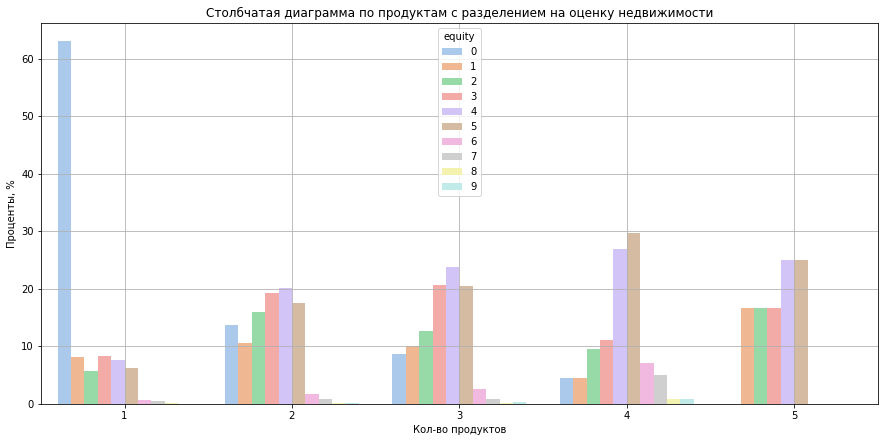

In [108]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='equity', data=products_equity)
plt.title('Столбчатая диаграмма по продуктам с разделением на оценку недвижимости')
plt.ylabel('Проценты, %')
plt.xlabel('Кол-во продуктов')
plt.grid()
plt.show;

При использовании 1-го продукта, чаще имеют оценку 0, около 63.03%. Реже оценку 6-9 с процентам меньше 1\
При использовании 2-х продуктов, оценка 4-5 чаще встречается, около 18-21%. С оценкой 3, около 19.25% клиентов\
При использовании 3-х продуктов, оценка 4-5 еще выше, около 21-24%. Остальное похоже на два предыдущих продукта.\
При использовании 4-х продуктов, оценки 4-5 встречается чаще всего, около 27-30%. Тут чаще, чем в других продуктовых группах встречаются оценки 6 и 7, около 7% и 5% .\
При использовании 5 продуктов, не встрчеются клиенты выше оценки 5. Все схоже, как у клиентов с четырьмя продуктами, только все что было выше 5, ушло в другие оценки, которы находятся ниже.

### Построим диаграмму с разделением по городам и активности

In [109]:
city_activity = df.pivot_table(index = ['city','last_activity'], values = 'userid', aggfunc = 'count').reset_index()
all_city_activity = df.pivot_table(index= 'city', values = 'last_activity', aggfunc = 'count').reset_index()
city_activity = city_activity.merge(all_city_activity, how='inner', on='city')
city_activity = city_activity.rename(columns={"last_activity_y": "all_sum", "userid": "count", "last_activity_x": "Активность"})
city_activity['percent'] = round(city_activity['count'] / city_activity['all_sum'] * 100,2)
city_activity = city_activity.sort_values(by = ['city','all_sum','percent'])
city_activity

,city,Активность,count,all_sum,percent
0,Ростов,0,543,1166,46.57
1,Ростов,1,623,1166,53.43
2,Рыбинск,0,964,2205,43.72
3,Рыбинск,1,1241,2205,56.28
4,Ярославль,0,2343,4701,49.84
5,Ярославль,1,2358,4701,50.16


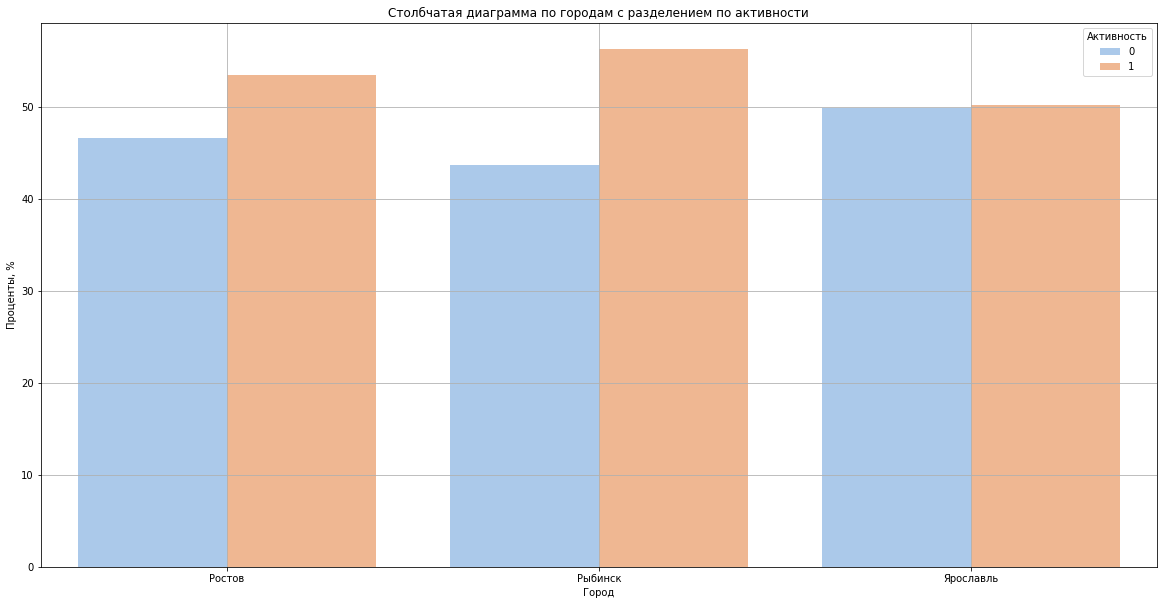

In [110]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x='city', y='percent',hue='Активность', data=city_activity)
plt.title('Столбчатая диаграмма по городам с разделением по активности')
plt.ylabel('Проценты, %')
plt.xlabel('Город')

plt.grid()
plt.show;

Рыбинске пользователи более активные, чем в других городах. В Ярославле наоборот

### Построим диаграмму с разделением по активности и клиентами, которые ушли

In [111]:
activity_churn = df.pivot_table(index = ['last_activity','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_activity_churn = df.pivot_table(index= 'last_activity', values = 'churn', aggfunc = 'count').reset_index()
activity_churn = activity_churn.merge(all_activity_churn, how='inner', on='last_activity')
activity_churn = activity_churn.rename(columns={"churn_y": "all_sum", "userid": "count", "churn_x": "Ушел или нет"})
activity_churn['percent'] = round(activity_churn['count'] / activity_churn['all_sum'] * 100,2)
activity_churn

,last_activity,Ушел или нет,count,all_sum,percent
0,0,0,3522,3850,91.48
1,0,1,328,3850,8.52
2,1,0,3469,4222,82.16
3,1,1,753,4222,17.84


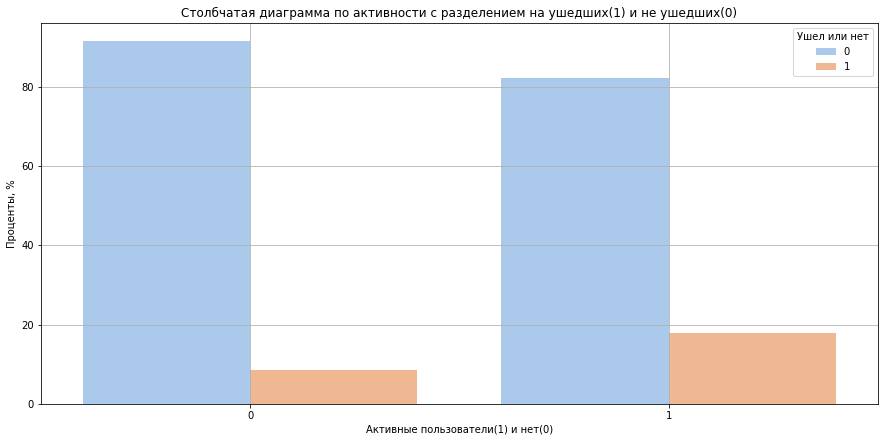

In [112]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='last_activity', y='percent',hue='Ушел или нет', data=activity_churn)
plt.title('Столбчатая диаграмма по активности с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Активные пользователи(1) и нет(0)')
plt.grid()
plt.show;

Активные пользователи чаще уходят из банка, чем неактивные, около 17.84%.\
Неактивные пользователи уходят реже, около 8.52%

### Построим диаграмму с разделением по продуктам и  активности

In [113]:
products_activity = df.pivot_table(index = ['products','last_activity'], values = 'userid', aggfunc = 'count').reset_index()
all_products_activity = df.pivot_table(index= 'products', values = 'last_activity', aggfunc = 'count').reset_index()
products_activity = products_activity.merge(all_products_activity, how='inner', on='products')
products_activity = products_activity.rename(columns={"last_activity_x": "last_activity", "userid": "count", "last_activity_y": "Всего по продукту"})
products_activity['percent'] = round(products_activity['count'] / products_activity['Всего по продукту'] * 100,2)
products_activity

,products,last_activity,count,Всего по продукту,percent
0,1,0,1475,3132,47.09
1,1,1,1657,3132,52.91
2,2,0,1956,4016,48.71
3,2,1,2060,4016,51.29
4,3,0,396,670,59.10
5,3,1,274,670,40.90
6,4,0,23,242,9.50
7,4,1,219,242,90.50
8,5,1,12,12,100.00


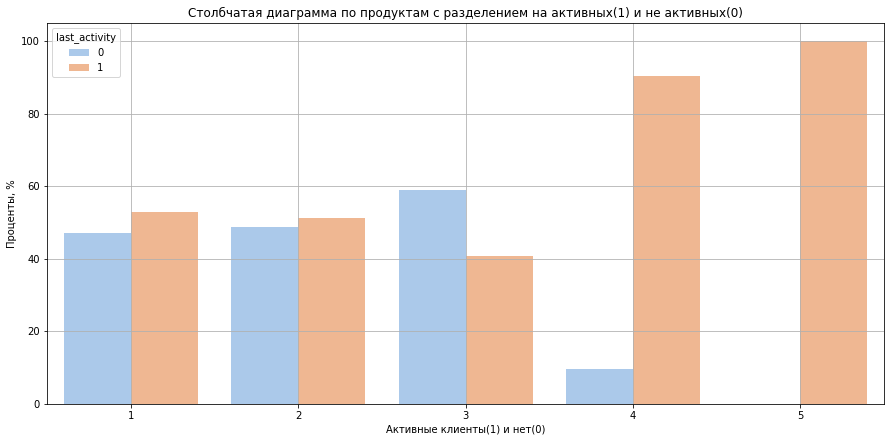

In [114]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='last_activity', data=products_activity)
plt.title('Столбчатая диаграмма по продуктам с разделением на активных(1) и не активных(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Активные клиенты(1) и нет(0)')
plt.grid()
plt.show;

Клиенты, использующие 1-2 продукта имеют примерно одинаковое распределение, активные около 47-52%\
Клиенты, использующие 3 продукта менее активные, около 41%\
Клиенты, использующие 4 продукта очень активные, около 78%\
Клиенты, используюшие 5 продуктов самые активные, около 89%\
С 4-мя и 5-тью продуктами, справедливо быть активными.

### Построим диаграмму с разделением по городам и владению кредитной картой

In [115]:
city_credit_card = df.pivot_table(index = ['city','credit_card'], values = 'userid', aggfunc = 'count').reset_index()
all_city_credit_card = df.pivot_table(index= 'city', values = 'credit_card', aggfunc = 'count').reset_index()
city_credit_card = city_credit_card.merge(all_city_credit_card, how='inner', on='city')
city_credit_card = city_credit_card.rename(columns={"credit_card_y": "all_sum", "userid": "count", "credit_card_x": "Владение кредитной картой"})
city_credit_card['percent'] = round(city_credit_card['count'] / city_credit_card['all_sum'] * 100,2)
city_credit_card = city_credit_card.sort_values(by = ['city','all_sum','percent'])
city_credit_card

,city,Владение кредитной картой,count,all_sum,percent
0,Ростов,0,480,1166,41.17
1,Ростов,1,686,1166,58.83
2,Рыбинск,0,731,2205,33.15
3,Рыбинск,1,1474,2205,66.85
4,Ярославль,0,1064,4701,22.63
5,Ярославль,1,3637,4701,77.37


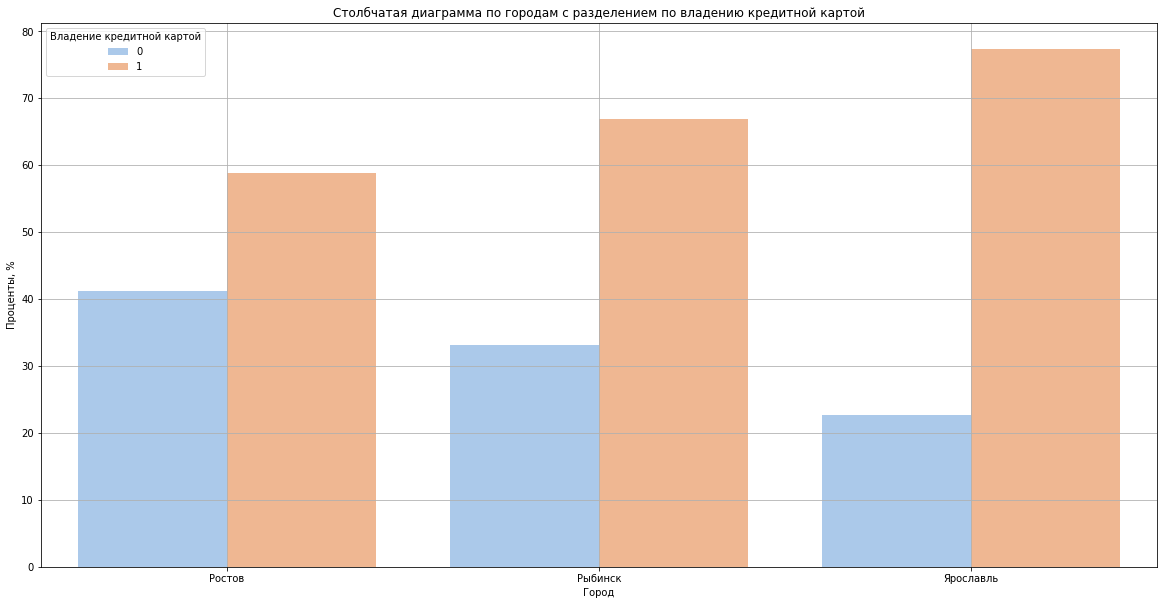

In [116]:
plt.figure(figsize = (20,10))
ax = sns.barplot(x='city', y='percent',hue='Владение кредитной картой', data=city_credit_card)
plt.title('Столбчатая диаграмма по городам с разделением по владению кредитной картой')
plt.ylabel('Проценты, %')
plt.xlabel('Город')

plt.grid()
plt.show;

В Ярославле наибольший процент пользователей, которые используют кредитку, около 77.37%.\
В Ростове наименьший, используют около 58.83%\
В Рыбинске около 66.85%.

### Построим диаграмму с разделением по владению кредитной картой и клиентами, которые ушли

In [117]:
credit_card_churn = df.pivot_table(index = ['credit_card','churn'], values = 'userid', aggfunc = 'count').reset_index()
all_credit_card_churn = df.pivot_table(index= 'credit_card', values = 'churn', aggfunc = 'count').reset_index()
credit_card_churn = credit_card_churn.merge(all_credit_card_churn, how='inner', on='credit_card')
credit_card_churn = credit_card_churn.rename(columns={"churn_y": "all_sum", "userid": "count", "churn_x": "Ушел или нет"})
credit_card_churn['percent'] = round(credit_card_churn['count'] / credit_card_churn['all_sum'] * 100,2)
credit_card_churn

,credit_card,Ушел или нет,count,all_sum,percent
0,0,0,1863,2275,81.89
1,0,1,412,2275,18.11
2,1,0,5128,5797,88.46
3,1,1,669,5797,11.54


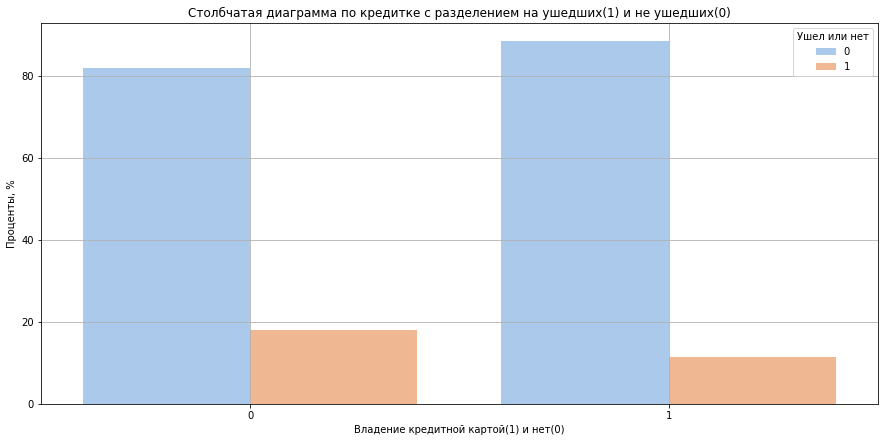

In [118]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='credit_card', y='percent',hue='Ушел или нет', data=credit_card_churn)
plt.title('Столбчатая диаграмма по кредитке с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Владение кредитной картой(1) и нет(0)')
plt.grid()
plt.show;

Пользователи, которые не владеют кредиткой, чаще уходят, тем, кто не владеют, около 18.11%\
Клиенты, которые используют уходят около 11.54%

### Построим диаграмму с разделением по продуктами и владению кредитной картой

In [119]:
products_credit_card = df.pivot_table(index = ['products','credit_card'], values = 'userid', aggfunc = 'count').reset_index()
all_products_credit_card = df.pivot_table(index= 'products', values = 'credit_card', aggfunc = 'count').reset_index()
products_credit_card = products_credit_card.merge(all_products_credit_card, how='inner', on='products')
products_credit_card = products_credit_card.rename(columns={"credit_card_x": "credit_card", "userid": "count", "credit_card_y": "Всего по продукту"})
products_credit_card['percent'] = round(products_credit_card['count'] / products_credit_card['Всего по продукту'] * 100,2)
products_credit_card

,products,credit_card,count,Всего по продукту,percent
0,1,0,445,3132,14.21
1,1,1,2687,3132,85.79
2,2,0,1337,4016,33.29
3,2,1,2679,4016,66.71
4,3,0,410,670,61.19
5,3,1,260,670,38.81
6,4,0,83,242,34.30
7,4,1,159,242,65.70
8,5,1,12,12,100.00


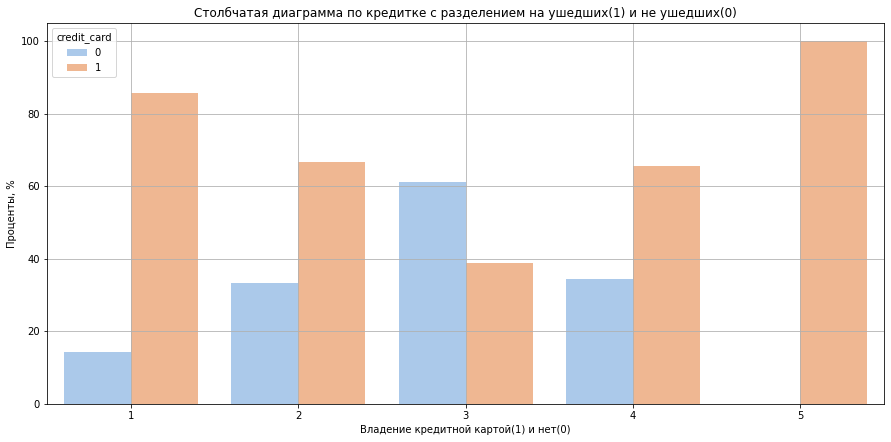

In [120]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='products', y='percent',hue='credit_card', data=products_credit_card)
plt.title('Столбчатая диаграмма по кредитке с разделением на ушедших(1) и не ушедших(0)')
plt.ylabel('Проценты, %')
plt.xlabel('Владение кредитной картой(1) и нет(0)')
plt.grid()
plt.show;

При использовании 1-ого продукта, используют кредитку около 86.4%\
При использовании 2-х продуктов, используют кредитку около 66.71%\
При использовании 3-х продуктов, используют кредитку около 38.81%\
При использовании 4-х продуктов, используют кредитку около 65.70%\
При использовании 5-ти продуктов, используют 100%, но их всего 19 человек.

### Посмотрим на вип-сегмент клиентов

In [121]:
df_vip.head()

,age,age_1,age_2,age_3,age_4,age_5,balance,cat_age,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,est_salary_4,est_salary_5,gender,index1,last_activity,products,score,score_2,score_3,score_4,score_5,userid
3,51.0,0,0,1,0,0,1524746.26,3 категория_49-60,4 категория,3 категория_821_875,1,Ярославль,0,5,174423.53,0,0,0,1,0,Ж,3,1,2,866.0,0,1,0,0,225363
8,54.0,0,0,1,0,0,1206337.87,3 категория_49-60,4 категория,4 категория_876_940,0,Ярославль,1,5,155371.79,0,0,0,1,0,М,8,0,2,923.0,0,0,1,0,211686
15,42.0,0,1,0,0,0,1480548.47,2 категория_36-48,4 категория,2 категория_596_820,0,Рыбинск,1,3,160974.43,0,0,0,1,0,М,15,0,3,731.0,1,0,0,0,120260
18,40.0,0,1,0,0,0,2307947.36,2 категория_36-48,5 категория,4 категория_876_940,0,Ярославль,0,5,287010.61,0,0,0,0,1,М,18,0,2,876.0,0,0,1,0,136651
20,43.0,0,1,0,0,0,1315511.65,2 категория_36-48,3 категория,2 категория_596_820,0,Ростов,0,3,143935.71,0,0,1,0,0,М,20,0,2,772.0,1,0,0,0,114192


#### Посмотрим диаграмму по ушедшим для вип-сегмента

In [122]:
count_user = df_vip.pivot_table(index = 'churn', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,churn,userid,sum
0,0,1189,61.7
1,1,738,38.3


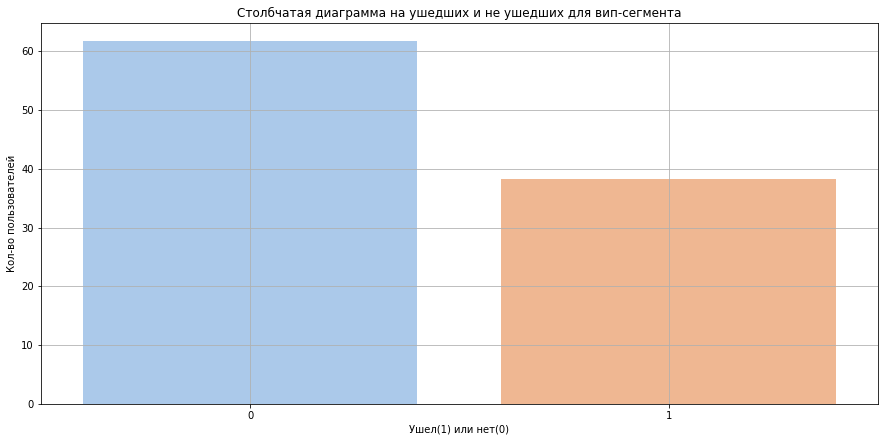

In [123]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='churn', y='sum', data=count_user)
plt.title('Столбчатая диаграмма на ушедших и не ушедших для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Ушел(1) или нет(0)')
plt.grid()
plt.show;

Ушедших 0.38%

#### Посмотрим диаграмму по категории возраста для вип-сегмента

In [124]:
count_user = df_vip.pivot_table(index = 'cat_age', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,cat_age,userid,sum
0,-,3,0.16
1,1 категория_18-35,415,21.54
2,2 категория_36-48,788,40.89
3,3 категория_49-60,492,25.53
4,4 категория_61-85,229,11.88


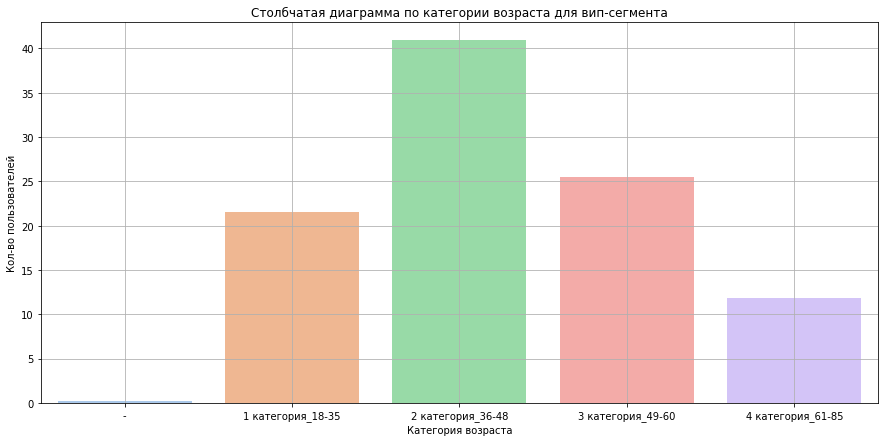

In [125]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='cat_age', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по категории возраста для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Категория возраста')
plt.grid()
plt.show;

В основном категория клиентов 36-48 лет, около 0.41%

#### Посмотрим диаграмму по категории кредитного скоринга для вип-сегмента

In [126]:
count_user = df_vip.pivot_table(index = 'cat_score', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,cat_score,userid,sum
0,2 категория_596_820,372,19.30
1,3 категория_821_875,483,25.06
2,4 категория_876_940,876,45.46
3,5 категория_941_1000,196,10.17


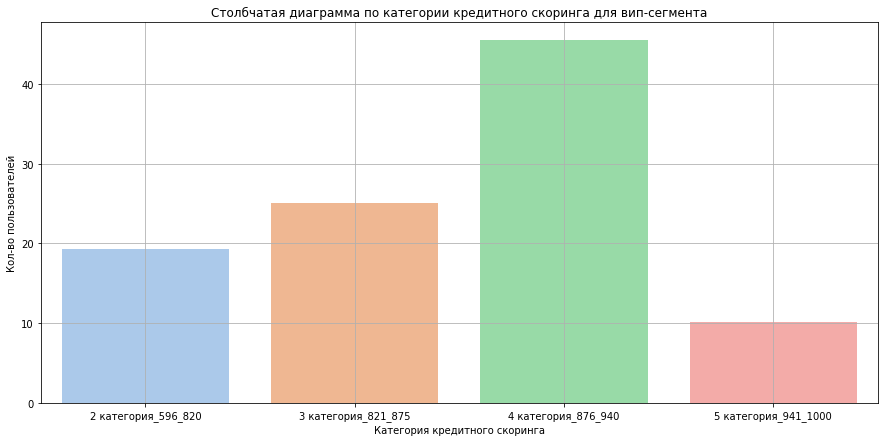

In [127]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='cat_score', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по категории кредитного скоринга для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Категория кредитного скоринга')
plt.grid()
plt.show;

Чаще всего встречается категория 876-940 баллов, около 0.45%

#### Посмотрим диаграмму по категории категории зарплате для вип-сегмента

In [128]:
count_user = df_vip.pivot_table(index = 'cat_salary', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,cat_salary,userid,sum
0,1 категория,188,9.76
1,2 категория,356,18.47
2,3 категория,527,27.35
3,4 категория,636,33.00
4,5 категория,220,11.42


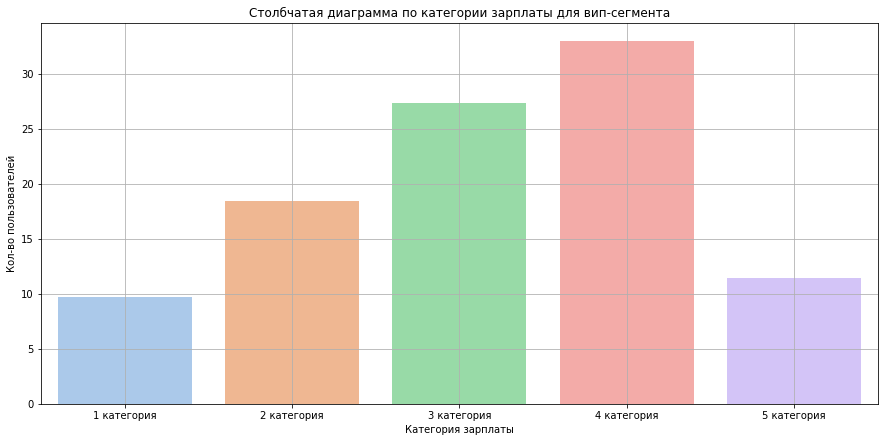

In [129]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='cat_salary', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по категории зарплаты для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Категория зарплаты')
plt.grid()
plt.show;

Чаще всего 154 960 руб < зарплата <= 270 000 руб, около 0.33%

#### Посмотрим диаграмму по полу  для вип-сегмента

In [130]:
count_user = df_vip.pivot_table(index = 'gender', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,gender,userid,sum
0,Ж,924,47.95
1,М,1003,52.05


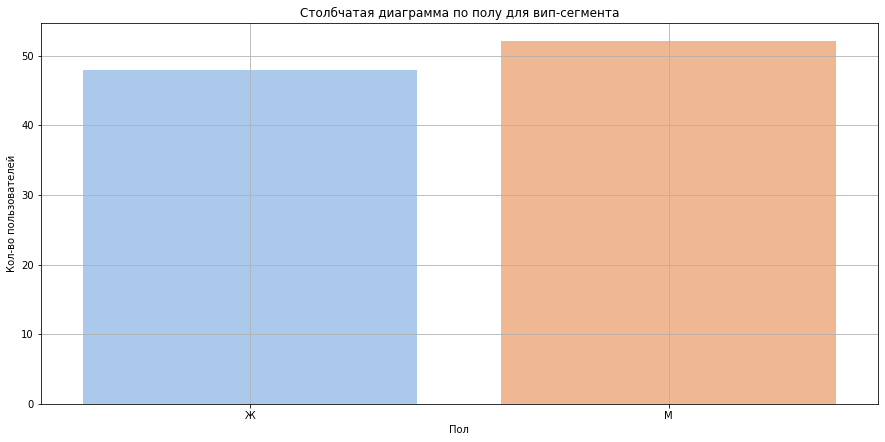

In [131]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='gender', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по полу для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Пол')
plt.grid()
plt.show;

Мужчин больше 52%, женщин 48%

#### Посмотрим диаграмму по рейтингу владения недвижимости  для вип-сегмента

In [132]:
count_user = df_vip.pivot_table(index = 'equity', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,equity,userid,sum
0,0,2,0.10
1,1,18,0.93
2,2,122,6.33
3,3,343,17.80
4,4,575,29.84
5,5,806,41.83
6,6,38,1.97
7,7,17,0.88
8,8,3,0.16
9,9,3,0.16


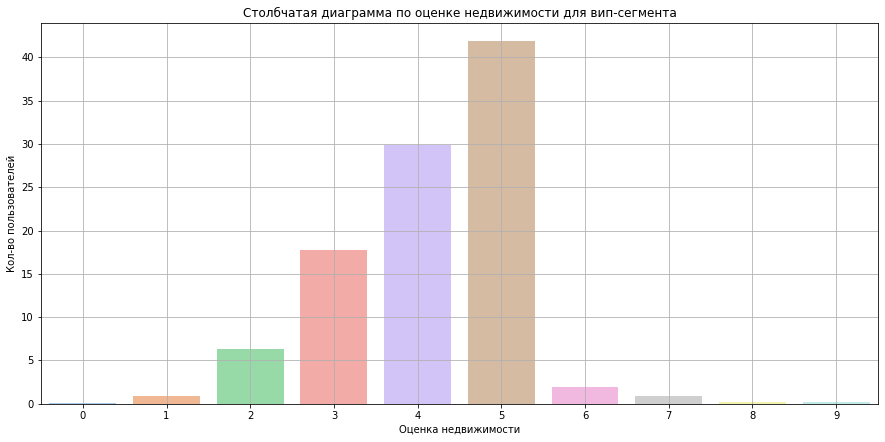

In [133]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='equity', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по оценке недвижимости для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Оценка недвижимости')
plt.grid()
plt.show;

Чаще всего встречается оценка 5 баллов, 0,42%

#### Посмотрим диаграмму по активности  для вип-сегмента

In [134]:
count_user = df_vip.pivot_table(index = 'last_activity', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,last_activity,userid,sum
0,0,914,47.43
1,1,1013,52.57


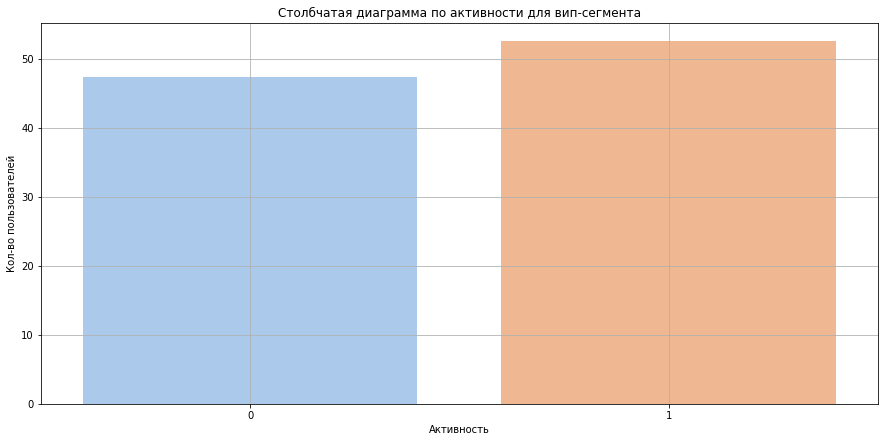

In [135]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='last_activity', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по активности для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Активность')
plt.grid()
plt.show;

Активных больше, но не сильно, 53%

#### Посмотрим диаграмму по владению кредитной картой  для вип-сегмента

In [136]:
count_user = df_vip.pivot_table(index = 'credit_card', values = 'userid', aggfunc = 'count').reset_index()
count_user['sum'] = round(count_user['userid'] / df_vip['userid'].count()*100,2)
count_user

,credit_card,userid,sum
0,0,920,47.74
1,1,1007,52.26


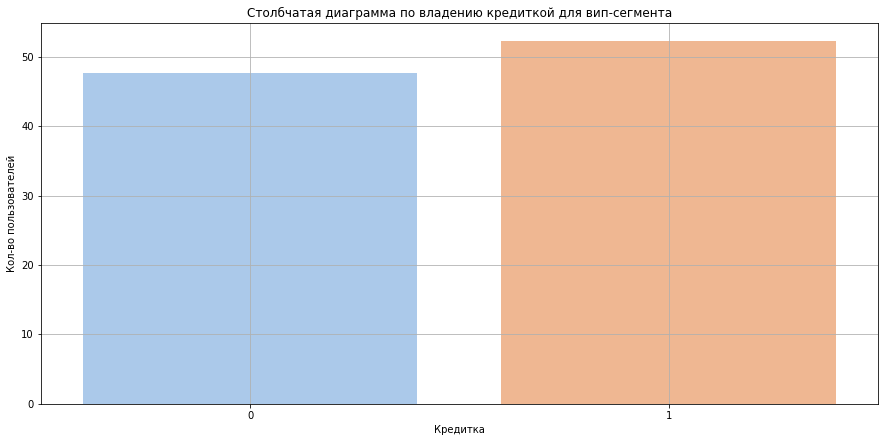

In [137]:
plt.figure(figsize = (15,7))
ax = sns.barplot(x='credit_card', y='sum', data=count_user)
plt.title('Столбчатая диаграмма по владению кредиткой для вип-сегмента')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Кредитка')
plt.grid()
plt.show;

Кредиткой владеют 52%

#### Вывод по вип-сегменту

* Ушедших 0.38%
* В основном категория клиентов 36-48 лет, около 0.41%
* Чаще всего встречается категория 876-940 баллов, около 0.45%
* Чаще всего 154 960 руб < зарплата <= 270 000 руб, около 0.33%
* Мужчин больше 52%, женщин 48%
* Чаще всего встречается оценка 5 баллов, 0,42%
* Активных больше, но не сильно, 53%
* Кредиткой владеют 52%

### Корреляционный анализ

**Построим общую матрицу**

interval columns not set, guessing: ['M', 'W', 'age', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'balance', 'churn', 'credit_card', 'equity', 'est_salary', 'est_salary_1', 'est_salary_2', 'est_salary_3', 'est_salary_4', 'est_salary_5', 'index1', 'last_activity', 'product_1', 'product_2', 'product_3', 'product_4', 'product_5', 'products', 'score', 'score_2', 'score_3', 'score_4', 'score_5', 'Ростов', 'Рыбинск', 'Ярославль']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable index1 for analysis 0. Dropping this column
  warnings.warn(


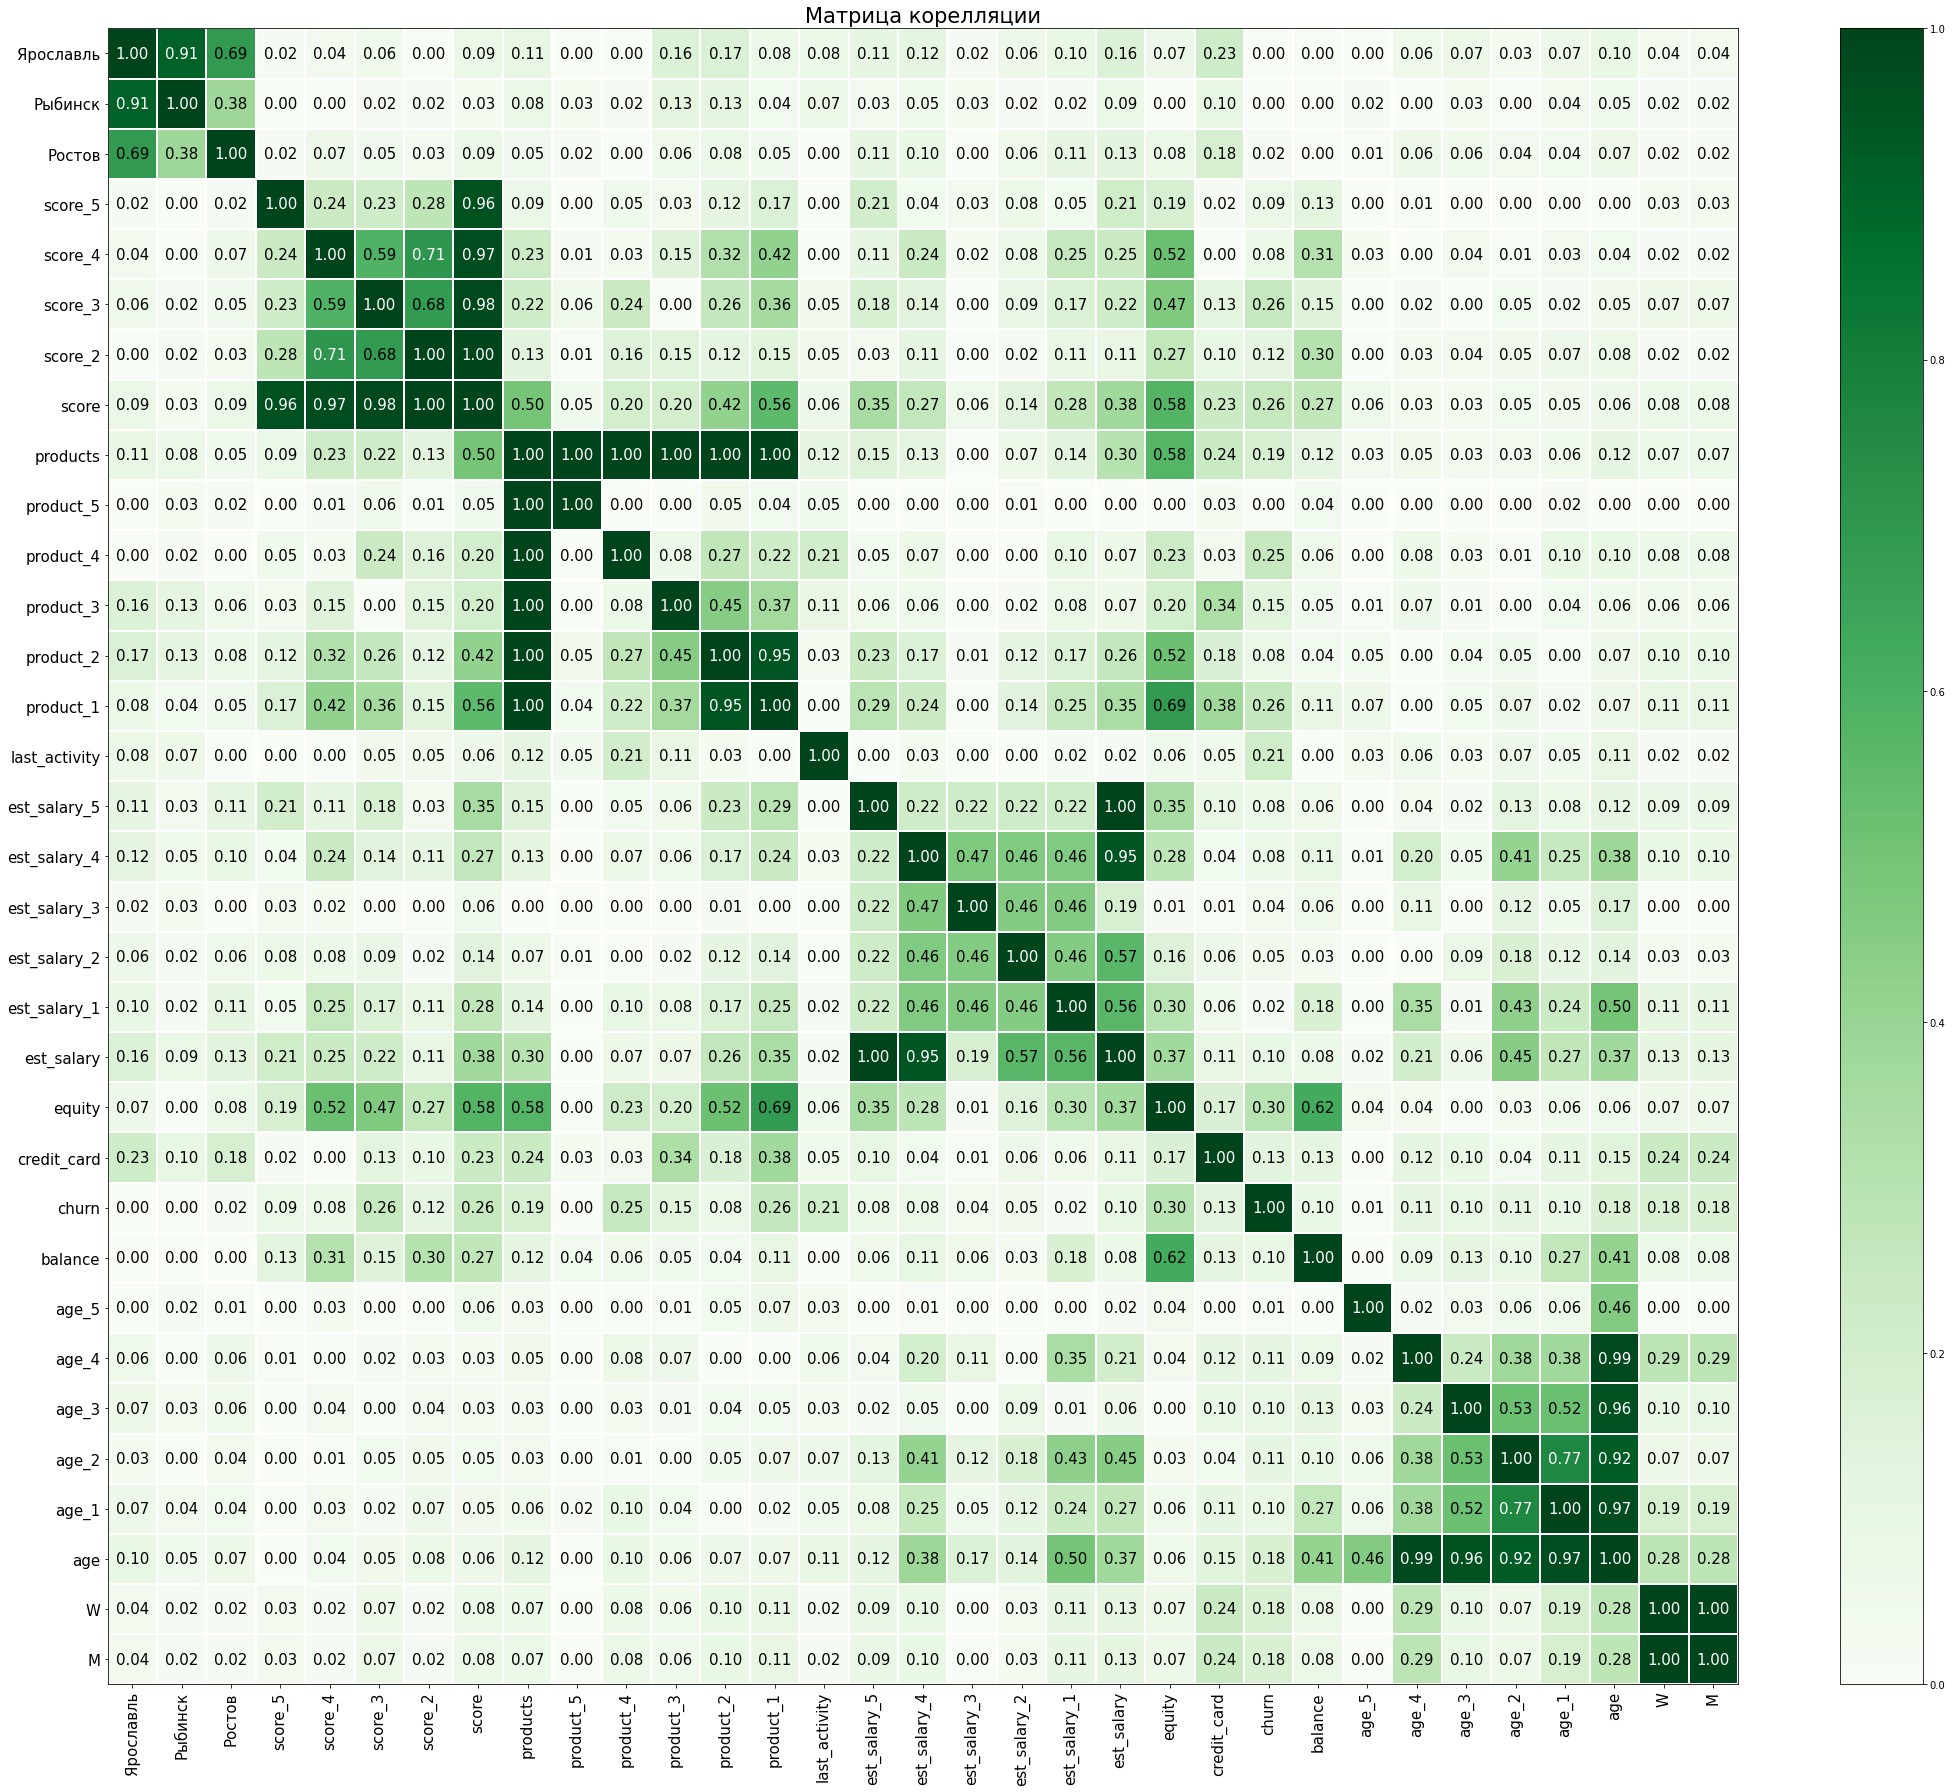

In [138]:
df_for_matrix = df.drop(columns=['userid', 'gender','city', 'cat_score','cat_salary','cat_age','index2'])
phik_overview = df_for_matrix.phik_matrix()
phik_overview

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корелляции", 
                        fontsize_factor=1.5, 
                        figsize=(30, 25))
plt.tight_layout()

Успешно построили матрицу

Из интересеного: 
* на матрице можно увидеть, взаимосвязь между балансом и оценкой недвижимости, 0.62, по шкале Чеддока заметная
* Также прослеживается взаимосвязь между возрастом и доходом, 0.37, взаимосвязь умеренная
* Оценка недвижимости корреляирует кредитным скорингом и количеством продуктов, по 0.58%, взаимосвязь заметная
* Люди использующие один продукт имеют взаимосвязь с кредитным скорингом из 4 или 3 группы, взаимосвязь умеренная

**Построим матрицу корреляции по столбцу с ушедшими**

interval columns not set, guessing: ['M', 'W', 'age', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'balance', 'churn', 'credit_card', 'equity', 'est_salary', 'est_salary_1', 'est_salary_2', 'est_salary_3', 'est_salary_4', 'est_salary_5', 'index1', 'index2', 'last_activity', 'product_1', 'product_2', 'product_3', 'product_4', 'product_5', 'products', 'score', 'score_2', 'score_3', 'score_4', 'score_5', 'Ростов', 'Рыбинск', 'Ярославль']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable index1 for analysis 0. Dropping this column
  warnings.warn(


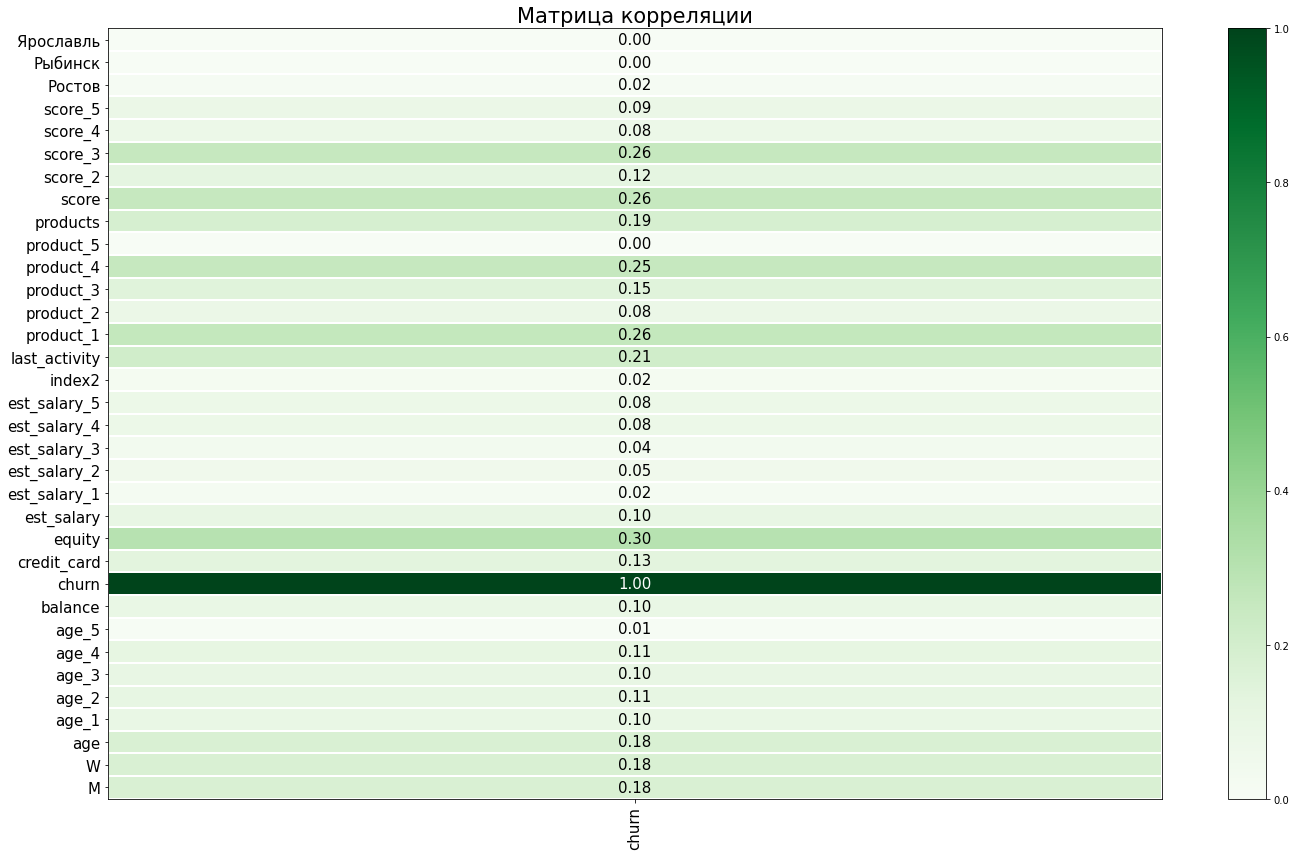

In [139]:
df_for_matrix = df.drop(columns=['userid', 'gender','city', 'cat_score','cat_salary','cat_age'])
phik_overview = df_for_matrix.phik_matrix()
phik_overview_1 = phik_overview[['churn']]

plot_correlation_matrix(phik_overview_1.values, 
                        x_labels=phik_overview_1.columns, 
                        y_labels=phik_overview_1.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляции", 
                        fontsize_factor=1.5, 
                        figsize=(20, 12))
plt.tight_layout()

Из полученной матрицы нас больше всего интересует колонка churn и корреляция с другими столбцами, посмотрим на нее, это пригодится для дальнейшей сегментации клиентов, воспользуемся шкалой Чеддока:
* Чем выше кредитный скоринг, чем чаще уходят, но взаимосвязь слабая, корелляция составляет около 0.26
* Также видно, что пользователи, которые пользуются 4-мя продуктами, чаще уходят, чем клиенты, которые пользуются меньше или больше продуктами банка, корелляция составляет 0.25, это слабая взаимосвязь
* Также видно, что пользователи, которые пользуются 1 продукт, чаще уходя, корелляция составляет 0.26, это слабая взаимосвязь
* активные пользователи чаще уходят, чем неактивные, корелляция составляет около 0.21, взаимосвязь слабая
* Оценка владеемой недвижимости влияет на отток, корелляция 0.3, взаимосвязь слабая
* Владение кредитки также влияет на уход, корелляция 0.13, это слабая взаимосвязь
* Чем старше люди, тем они чаще уходят, также это видно, корелляция 0.18, взаимосвязь слабая

### Вывод по исследовательскому анализу

* **Общая гистограмма**\
    Проанализировав полученные гистограммы:
    * Можем заметить, что больше всего клиентов в банке в возрасте 28-46 лет
    * Вполне логично увидеть, что пользователей, которые ушли в раз меньше, относительно пользователей которые остались. Так как если бы ушли, скорее всего банк уже закрылся бы
    * Также можем увидеть, что пользователей, которые владеют кредитной картой около 5000, а пользователей, которые не владеют около 2800 клиентов
    * Чаще всего владеют 4 или 5 объектами недвижимости
    * Столбец last_activity показывает, активен пользователь или нет. Можем увидеть, что активных пользователей, больше, чем неактивных, но отличие небольшие, это опасно, так как данные клиенты находятся в зоне риска, возможно скоро уйдут
    * Можем увидеть, клиенты чаще всего используют 2 продукта банка
    * Столбец с баллами кредитного скоринга имеют нормальные распределение
* **Диаграмма с количеством пользователей в каждом городе**\
    Клиентов из Ярославля гораздо больше, чем клиентов из других городов
* **Диаграммa с разделением по городам и продуктам**\
    Можем увидеть, что в разных городах чаще всего используют 2 продукта в банке, чуть реже 1 продукт, остальные меньше 5%.\
    Кроме Ярославля, там 3 продукта банка используют около 10.7%
* **Диаграмма с разделением по городам и клиентами, которые ушли**\
    В трех городах клиенты, которые ушли находятся в 12-15%.
* **Диаграмма с разделением по продуктам и клиентами, которые ушли**\
    Можем увидеть, что клиенты, у которых 4 продукта чаще уходят, чем клиенты имеющие меньше или больше продуктов.\
    Клиенты, которые используют 4 продукта, частота ухода 45.45%.\
    Важно отметить, что клиентов, которые используют 4 или 5 продуктов всего 242 и 12 человек, относительно других групп пользователей их мало.
* **Диаграмма с разделением по городам и возрасту**\
    Можем увидеть, что в данном датасете преобладают клиенты из 2 категории, то есть 36-48 лет, кроме Ярославля, там на один процент вырвалась категория 18-35 лет\
    Следом идет 1 категория, 18-35 лет.\
    3 категория, 48-60лет находится третим в списке.\
    Из 4 категории, 61-85 лет меньше 14%
* **Диаграмма с разделением по продуктам и возрасту**\
   Смотря на диаграмму, видно, что у клиентов распределение примерно похоже, клиенты с двумя продуктами отличаются тем, что вверх вырвалась категория 18-35 лет, но не сильно. Также видно, что пользователи из категории 61-85 лет чаще всего встречаются в категории с тремя продуктами\
    Клиенты из категории 49-60 лет примерно распределены поровну в продуктах 2-3, в 5 продуктов, там не присутствует их
* **Диаграмма с разделением по возрасту и клиентами, которые ушли**\
    Чаще всего уходят пользователи из категории 49-60 лет - 18.33%, 18-35 лет - 16.4%.\
    Меньше всего из группы 61-85 лет, 5.74%
* **Диаграмма с разделением по городам и кредитному скорингу**\
    Примерно во всех городах одинаковое распределение. Преобладает рейтинг 596-820
    В Рыбинске и Ярославле похожее распределение, Ростов немного отличился, третья категория 821-875 баллов выросла, а 876-940 уменьшилось
* **Диаграмма с разделением по продуктам и кредитному скорингу**\
    Клиенты, использующие один продукт, рейтинг 876-940 баллов в приоритете, относительно других групп\
    2 продукта, 596-820 баллов а следом идет 821-875 баллов\
    3 продукта, сильно вырывается вверх рейтинг 596-820 баллов\
    4 продукта, 821-875 баллов занимает больше 65% всех клиентов, 941-1000 баллов минимален\
    5 продуктов, 821-875 баллов больше 75%, отсутсвует 5 категория 941-1000 баллов
* **Диаграмма с разделением по кредитному скорингу и клиентами, которые ушли**\
    Клиенты, имеющие рейтинг 821-875 баллов чаще всего уходят, если смотреть на другие группы рейтинга, их процент составляет 22.56%\
    Клиенты с лучшим рейтингом реже всего уходят из банка, их процент составляет 5.16%
* **Диаграмма с разделением по городам и зарплате**\
    В Ростове большего всего клиентов с низкой зарплатой, 67 532 рублей и меньше(30.45%), меньше всего зарплата 270 000руб и больше(1.97%)\
    В Рыбинске преобладает 3 категория 106 150 руб < зарплата <= 154 960 руб(24.94%), также меньше всего высокая зарпалата(5.26%)\
    В Ярославле преобладает 4 категория 154 960 руб < зарплата <= 270 000 руб(26.74%), меньше всего по городу высокая зарплата, но больше, чем в других городах(7.76%)


* **Диаграмма с разделением по продуктам и зарплате**\
    Клиенты, использующие 1 продукт, у них преобладает зарплата из 4 категории, около 31.99%. Также выше, чем в других продуктах,  но наименьшее по продукту зарплата из 5 категории, около 12.01%\ 
    Клиенты, использующие 2-3 продукта, имеют примерно одинаковое распределение зарплаты, преобладают зарплаты из категории 1(27.66-30.75%)\
    Клиенты, использующие 4 продукта, преобладает зарплата из 1 категории, остальное схоже с 1 и 2 продуктом.\
    Клиенты, использующие 5 продуктов, имеют в преимуществе 2 категорию зарплат, около 41.67%. Отсутсвует 5 категория. По 5 продуктам всего 12 пользователей.
* **Диаграмма с разделением по зарплате и клиентами, которые ушли**\
    Чаще всего уходят пользователи из 1-3 категории, их уход около 14-16%, меньше всего из 5 категории, уход около 6.35%
* **Диаграмма с разделением по городам и полу**\
    В Ростове и Рыбинке распределение по полу примерно схоже, женщин в банке больше, чем мужчин, но не сильно. 51-52% против 48-49% примерно.\
    В Ярославле немного по-другому, мужчин и женщин почти поровну
* **Диаграмма с разделением по продуктам и полу**\
    1 продукт чаще используют мужчины, около 54%\
    2 продукта чаще используют женщины, около 54%\
    3 продукта чаще используют женщины, около 57%\
    4 продукта гораздо чаще используют мужчины, около 64%\
    5 продуктов чаще используют мужчины, около 50%
* **Диаграмма с разделением по полу и клиентами, которые ушли**\
    Женщины реже уходят, чем мужчины из банка, их процент ухода около 9.53%\
    Мужчины уходят около 17.32%
* **Диаграмма с разделением по городам и оценке владеемых объектов**\
    Во данных городах примерно похожее распределение по оценке владеемых объектов. 
    Чаще вего по городам встречается оценка 0, Ростове около 24.36%, В Ярославле наибольшая 34.50%
    Кроме оценки 0, преобладает оценки 3-5.
* **Диаграмма с разделением по оценке владеемых объектов и клиентами, которые ушли**\
    Чем выше оценка владеемых объектов, тем чаще уходят из банка. Заметин один провал при владении 8-мью объектами, там уходят реже, чем при владении 7-мью объектами.\
    При оценке 9, пользователи чаще уходят, чем остаются.
* **Диаграмма с разделением по продуктам и оценкой недвижимости**\
    При использовании 1-го продукта, чаще имеют оценку 0, около 63.03%. Реже оценку 6-9 с процентам меньше 1\
    При использовании 2-х продуктов, оценка 4-5 чаще встречается, около 18-21%. С оценкой 3, около 19.25% клиентов\
    При использовании 3-х продуктов, оценка 4-5 еще выше, около 21-24%. Остальное похоже на два предыдущих продукта.\
    При использовании 4-х продуктов, оценки 4-5 встречается чаще всего, около 27-30%. Тут чаще, чем в других продуктовых группах встречаются оценки 6 и 7, около 7% и 5% .\
    При использовании 5 продуктов, не встрчеются клиенты выше оценки 5. Все схоже, как у клиентов с четырьмя продуктами, только все что было выше 5, ушло в другие оценки, которы находятся ниже.
* **Диаграмма с разделением по городам и активности**\
    Рыбинске пользователи более активные, чем в других городах. В Ярославле наоборот
* **Диаграмма с разделением по активности и клиентами, которые ушли**\
    Активные пользователи чаще уходят из банка, чем неактивные, около 17.84%.\
    Неактивные пользователи уходят реже, около 8.52%
* **Диаграмма с разделением по продуктам и активности**\
    Клиенты, использующие 1-2 продукта имеют примерно одинаковое распределение, активные около 47-52%\
    Клиенты, использующие 3 продукта менее активные, около 41%\
    Клиенты, использующие 4 продукта очень активные, около 78%\
    Клиенты, используюшие 5 продуктов самые активные, около 89%\
    С 4-мя и 5-тью продуктами, справедливо быть активными.
* **Диаграмма с разделением по городам и владению кредитной картой**\
    В Ярославле наибольший процент пользователей, которые используют кредитку, около 77.37%.\
    В Ростове наименьший, используют около 58.83%\
    В Рыбинске около 66.85%.
* **Диаграмма с разделением по владению кредитной картой и клиентами, которые ушли**\
    Пользователи, которые не владеют кредиткой, чаще уходят, тем, кто не владеют, около 18.11%\
    Клиенты, которые используют уходят около 11.54%
* **Диаграмма с разделением по продуктами и владению кредитной картой**\
    При использовании 1-ого продукта, используют кредитку около 86.4%\
    При использовании 2-х продуктов, используют кредитку около 66.71%\
    При использовании 3-х продуктов, используют кредитку около 38.81%\
    При использовании 4-х продуктов, используют кредитку около 65.70%\
    При использовании 5-ти продуктов, используют 100%, но их всего 19 человек.
    
* **Вывод по вип-сегменту**
    * Ушедших 0.38%
    * В основном категория клиентов 36-48 лет, около 0.41%
    * Чаще всего встречается категория 876-940 баллов, около 0.45%
    * Чаще всего 154 960 руб < зарплата <= 270 000 руб, около 0.33%
    * Мужчин больше 52%, женщин 48%
    * Чаще всего встречается оценка 5 баллов, 0,42%
    * Активных больше, но не сильно, 53%
    * Кредиткой владеют 52%
    
* **Корелляционный анализ**\
    Из полученной матрицы нас больше всего интересует колонка churn и корреляция с другими столбцами, посмотрим на нее, это пригодится для дальнейшей сегментации клиентов, воспользуемся шкалой Чеддока:
    * Чем выше кредитный скоринг, чем чаще уходят, но взаимосвязь слабая, корелляция составляет около 0.26
    * Также видно, что пользователи, которые пользуются 4-мя продуктами, чаще уходят, чем клиенты, которые пользуются меньше или больше продуктами банка, корелляция составляет 0.25, это слабая взаимосвязь
    * Также видно, что пользователи, которые пользуются 1 продукт, чаще уходя, корелляция составляет 0.26, это слабая взаимосвязь
    * активные пользователи чаще уходят, чем неактивные, корелляция составляет около 0.21, взаимосвязь слабая
    * Оценка владеемой недвижимости влияет на отток, корелляция 0.3, взаимосвязь слабая
    * Владение кредитки также влияет на уход, корелляция 0.13, это слабая взаимосвязь
    * Чем старше люди, тем они чаще уходят, также это видно, корелляция 0.18, взаимосвязь слабая\
    **Из интересеного:** 
    * на матрице можно увидеть, взаимосвязь между балансом и оценкой недвижимости, 0.62, по шкале Чеддока заметная
    * Также прослеживается взаимосвязь между возрастом и доходом, 0.37, взаимосвязь умеренная
    * Оценка недвижимости корреляирует кредитным скорингом и количеством продуктов, по 0.58%, взаимосвязь заметная
    * Люди использующие один продукт имеют взаимосвязь с кредитным скорингом из 4 или 3 группы, взаимосвязь умеренная

## Сегментация пользователей

Из ранее проведенного исследовательского анализа, можем провести сегментация пользователей по продуктам

### Cегмент 1. Клиент использует 1 продукт

Из исследования видно, что:
* В Ростове используют один продукт 407	клиента, или 34.91 % от всех клиентов в этом городе
* В Рыбинске используют один продукт 804 клиентов, или 36.46 % от всех клиентов в этом городе
* В Ярославль используют один продукт 1921 клиентов, или 40.86 % от всех клиентов в этом городе
* 196 клиентов, которые использовали 1 продукт ушли или	6.26 %
* 1 продуктом пользуются : 1 категория 18-35 лет - 34.55%, 2 категория 36-48 лет - 38.67%, 3 категория 49-60 лет - 16.57%, 4 категория 61-85 лет - 9.58%
* Рейтинг кредитного скоринга у клиентов: 2 категория 596-800 баллов - 31.80%, 3 категория 802-875 баллов - 14.50%, 4 категория 877-940 баллов - 45.37%, 5 категория 941-1000 баллов - 8.33%
* Зарплата: 1 категория зарплата меньше 67 532 руб  - 14.43 %, 2 категория 67 532 руб < зарплата <= 106 150 руб - 18.36%, 3 категория 106 150 руб < зарплата <= 154 960 руб - 23.21%, 4 категория: 154 960 руб < зарплата <= 270 000 руб - 31.99%, 5 категория: 270 000руб < зарплата - 12.01%
* Женщин около 46.07%, мужчин 53.93%
* Кол-во пользователей с рейтингом оценки недвижимости 0 - 63.03%, 1 - 8.08%, 2 - 5.65%, 3 - 8.27%, 4 - 7.54%, 5 - 6.16%, 6 - 0.73%, 7 - 0.45%, 8 - 0.06%, 9 - 0.03%
* Активных клиентов - 52.91%, неактивных - 47.09%
* Владеют кредитной картой - 85.79%, не владеют - 14.21%
* Уровень оттока 6.26%
* Размер: 3132 человек 

### Cегмент 2. Клиент использует 2 продукта

Из исследования видно, что:
* В Ростове используют 652 клиента, или 55.92 % от всех клиентов в этом городе
* В Рыбинске используют 1243 клиентов, или 56.37 % от всех клиентов в этом городе
* В Ярославль используют 2121 клиентов, или 45.12 % от всех клиентов в этом городе
* 613 клиентов, которые ушли или	15.26 %
* 1 категория 18-35 лет - 36.13%, 2 категория 36-48 лет - 34.44%, 3 категория 49-60 лет- 19.27%, 4 категория 61-85 лет - 10.03%
* Рейтинг кредитного скоринга у клиентов: 2 категория 596-800 баллов - 41.26%, 3 категория 802-875 баллов - 35.26%, 4 категория 877-940 баллов - 19.97%, 5 категория 941-1000 баллов - 3.51%
* Зарплата: 1 категория зарплата меньше 67 532 руб  - 27.66 %, 2 категория 67 532 руб < зарплата <= 106 150 руб - 26.39%, 3 категория 106 150 руб < зарплата <= 154 960 руб - 24.18%, 4 категория: 154 960 руб < зарплата <= 270 000 руб - 19.17%, 5 категория: 270 000руб < зарплата - 2.59%
* Женщин около 53.61%, мужчин 46.39%
* Кол-во пользователей с рейтингом оценки недвижимости 0 - 13.62%, 1 - 10.53%, 2 - 16.01%, 3 - 19.25%, 4 - 20.22%, 5 - 17.60%, 6 - 1.64%, 7 - 0.77%, 8 - 0.22%, 9 - 0.12%
* Активных клиентов - 51.29%, неактивных - 48.71%
* Владеют кредитной картой - 66.71%, не владеют - 33.29%
* Уровень оттока 19.10%
* Размер: 4016 человек 

### Cегмент 3. Клиент использует 3 продукта

Из исследования видно, что:
* В Ростове используют 64 клиента, или 5.49 % от всех клиентов в этом городе
* В Рыбинске используют 102 клиентов, или 4.63 % от всех клиентов в этом городе
* В Ярославль используют 504 клиентов, или 10.72 % от всех клиентов в этом городе
* 161 клиентов, которые ушли или 24.03 %
* 1 категория 18-35 лет - 31.04%, 2 категория 36-48 лет - 34.63%, 3 категория 49-60 лет- 20.00%, 4 категория 61-85 лет - 14.33%
* Рейтинг кредитного скоринга у клиентов: 2 категория 596-800 баллов - 52.84%, 3 категория 802-875 баллов - 28.81%, 4 категория 877-940 баллов - 14.93%, 5 категория 941-1000 баллов - 3.43%
* Зарплата: 1 категория зарплата меньше 67 532 руб  - 30.75 %, 2 категория 67 532 руб < зарплата <= 106 150 руб - 25.52%, 3 категория 106 150 руб < зарплата <= 154 960 руб - 22.69%, 4 категория: 154 960 руб < зарплата <= 270 000 руб - 18.06%, 5 категория: 270 000руб < зарплата - 2.99%
* Женщин около 56.87%, мужчин 43.13%
* Кол-во пользователей с рейтингом оценки недвижимости 0 - 8.66%, 1 - 10.00%, 2 - 12.69%, 3 - 20.60%, 4 - 23.73%, 5 - 20.45%, 6 - 2.54%, 7 - 0.9%, 8 - 0.15%, 9 - 0.30%
* Активных клиентов - 40.90%, неактивных - 59.10%
* Владеют кредитной картой - 38.81%, не владеют - 61.19%
* Уровень оттока 24.03%
* Размер: 610 человек 

### Cегмент 4. Клиент использует 4 продукта

Из исследования видно, что:
* В Ростове используют 39 клиента, или 3.34 % от всех клиентов в этом городе
* В Рыбинске используют 56 клиентов, или 2.54 % от всех клиентов в этом городе
* В Ярославль используют 147 клиентов, или 3.13 % от всех клиентов в этом городе
* 110 клиентов, которые ушли или 45.45 %
* 1 категория 18-35 лет - 52.89%, 2 категория 36-48 лет - 32.64%, 3 категория 49-60 лет- 13.64%, 4 категория 61-85 лет - 0.83%
* Рейтинг кредитного скоринга у клиентов: 2 категория 596-800 баллов - 9.09%, 3 категория 802-875 баллов - 66.94%, 4 категория 877-940 баллов - 23.55%, 5 категория 941-1000 баллов - 0.41%
* Зарплата: 1 категория зарплата меньше 67 532 руб  - 39.26 %, 2 категория 67 532 руб < зарплата <= 106 150 руб - 26.03%, 3 категория 106 150 руб < зарплата <= 154 960 руб - 20.66%, 4 категория: 154 960 руб < зарплата <= 270 000 руб - 12.40%, 5 категория: 270 000руб < зарплата - 1.65%
* Женщин около 35.95%, мужчин 64.05%
* Кол-во пользователей с рейтингом оценки недвижимости 0 - 4.55%, 1 - 4.55%, 2 - 9.50%, 3 - 11.16%, 4 - 26.86%, 5 - 29.75%, 6 - 7.02%, 7 - 4.96%, 8 - 0.83%, 9 - 0.83%
* Активных клиентов - 90.50%, неактивных - 9.50%
* Владеют кредитной картой - 65.70%, не владеют - 34.30%
* Уровень оттока 45.45 %
* Размер: 242 человек 

### Cегмент 5. Клиент использует 5 продукта

Из исследования видно, что:
* В Ростове используют 4 клиента, или 0.34 % от всех клиентов в этом городе
* В Рыбинске нету пользователей, которые используют 5 продуктов
* В Ярославль используют 8 клиентов, или 0.17 % от всех клиентов в этом городе
* 1 клиентов, которые ушли 8.33 %
* 1 категория 18-35 лет - 58.33%, 2 категория 36-48 лет - 25.00%, 3 категория 49-60 лет- 16.67%
* Рейтинг кредитного скоринга у клиентов: 2 категория 802-875 баллов - 16.67%, 3 категория 877-940 баллов - 75.00%, 4 категория 877-940 баллов - 8.33%
* Зарплата: 1 категория зарплата меньше 67 532 руб  - 25.00 %, 2 категория 67 532 руб < зарплата <= 106 150 руб - 41.67%, 3 категория 106 150 руб < зарплата <= 154 960 руб - 25.00%, 4 категория: 154 960 руб < зарплата <= 270 000 руб - 8.33%
* Женщин около 50.00%, мужчин 50.00%
* Кол-во пользователей с рейтингом оценки недвижимости 1 - 16.67%, 2 - 16.67%, 3 - 16.67%, 4 - 25.00%, 5 - 25.00%
* Активных клиентов - 100.00%
* Владеют кредитной картой - 100.00%
* Уровень оттока 8.33 %
* Размер: 12 человек 

### Вип-сегмент

Из исследования видно, что:
* клиентов, которые ушли 38.3 %
* 1 категория 18-35 лет - 21.54%, 2 категория 36-48 лет - 40.89%, 3 категория 49-60 лет- 25.53%, 4 категория 49-60 лет- 11.88%
* Рейтинг кредитного скоринга у клиентов: 2 категория 802-875 баллов - 19.30%, 3 категория 877-940 баллов - 25.06%, 4 категория 877-940 баллов - 45.46%, 5 категория 877-940 баллов - 10.17%
* Зарплата: 1 категория зарплата меньше 67 532 руб  - 9.76 %, 2 категория 67 532 руб < зарплата <= 106 150 руб - 18.47%, 3 категория 106 150 руб < зарплата <= 154 960 руб - 27.35%, 4 категория: 154 960 руб < зарплата <= 270 000 руб - 33.00%, 5 категория: 270 000руб < зарплата - 11.42%
* Женщин около 48.00%, мужчин 52.00%
* Кол-во пользователей с рейтингом оценки недвижимости 0 - 0.10%, 1 - 0.93%, 2 - 6.33%, 3 - 17.80%, 4 - 29.84%, 5 - 41.83%, 6 - 1.97%, 7 - 0.88%, 8 - 0.16%, 9 - 0.16%
* Активных клиентов - 53%
* Владеют кредитной картой - 52%
* Уровень оттока 38.3% 
* Размер: 1927 человек

## Портреты типичных пользователей

### Клиенты используют 1 продукт

Одним продуктом, пользуются клиенты в основном возраста 18-48 лет, кредитный скоринг у них в основном 877-940 баллов, зарплата от 154 960 руб до 270 000 руб, мужчин пользуется больше, оценка недвижимости в основном 0, на активных и неактивных делится по почти ровну, неактивных больше на 3%, в основном владеют кредитной картой.

### Клиенты используют 2 продукта

Двумя продуктами пользуются клиенты, 18-48 возраста, кредитный скоринг у них 596-800 баллов, зарплата зарплата разброса в диапопазоне до 154 960 руб, женщин больше использующих два продукта, рейтинг оценки недвижимости 3-5, активных больше, но не сильно, большинство владеют кредитной картой

### Клиенты используют 3 продукта

Тремя продуктами пользуются клиенты 36-48 возраста в основном, кредитный скоринг 596-800 баллов, зарплата в основном меньше 67 532 руб, женщин еще больше, относительно двух продуктов, оценка недвижимости 3-5, неактивных больше, чем активных, в основном не владеют кредиткой

### Клиенты используют 4 продукта

4-мя продуктами пользуюется в основном 18-35 лет, кредитный скоринг 802-875 баллов, зарплата в основном меньше 67 532 руб, мужчин больше, чем женщин, рейтинг оценки недвижимости 4-5, в основном активные клиенты, и владеют кредиткой.

### Клиенты используют 5 продуктов

5-ью продуктами пользуются клиенты возраста 18-35 лет, кредитный скоринг 877-940 баллов, 67 532 руб < зарплата <= 106 150 руб, мужчин и женщин поровну, рейтинг оценки недвижимости в основном 4-5, активные клиенты, все владеют кредиткой

### Клиенты из вип-сегмента

В вип-сегменте в основном пользователи 36-48 лет, кредитный скоринг 876-940 баллов, 154 960 руб < зарплата <= 270 000 руб, примерно поровну женщин и мужчин, рейтинг оценки недвижимости 5, примерно поровну активных и не активных, половина владеет кредиткой

## Проверка гипотез

Для проверки гипотез,  в датафрейме не должно присутствовать пропусков. В данном проекте, больше не будем использовать датафрейм, поэтому смело удалим все пропуски и они не как не повлияют на результат проведенного исследования

In [140]:
df.head()

,M,W,age,age_1,age_2,age_3,age_4,age_5,balance,cat_age,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,...,est_salary_5,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,score_2,score_3,score_4,score_5,userid,Ростов,Рыбинск,Ярославль
0,0,1,25.0,1,0,0,0,0,59214.82,1 категория_18-35,2 категория,3 категория_821_875,1,Рыбинск,0,1,75719.14,0,1,0,...,0,Ж,NaN,0,1,0,1,0,0,0,2,850.0,0,1,0,0,183012,0,1,0
1,0,1,37.0,0,1,0,0,0,850594.33,2 категория_36-48,2 категория,3 категория_821_875,0,Рыбинск,1,5,86621.77,0,1,0,...,0,Ж,NaN,1,0,0,0,1,0,0,3,861.0,0,1,0,0,146556,0,1,0
2,0,1,30.0,1,0,0,0,0,NaN,1 категория_18-35,3 категория,4 категория_876_940,0,Рыбинск,1,0,107683.34,0,0,1,...,0,Ж,NaN,2,1,1,0,0,0,0,1,892.0,0,0,1,0,120722,0,1,0
4,1,0,34.0,1,0,0,0,0,174.00,1 категория_18-35,1 категория,2 категория_596_820,1,Ярославль,1,5,67353.16,1,0,0,...,0,М,NaN,4,0,1,0,0,0,0,1,730.0,1,0,0,0,157978,0,0,1
5,1,0,56.0,0,0,1,0,0,863687.24,3 категория_49-60,4 категория,3 категория_821_875,0,Рыбинск,1,4,156619.80,0,0,0,...,0,М,NaN,5,0,0,0,1,0,0,3,856.0,0,1,0,0,202305,0,1,0


In [141]:
df['index1'] = 1

In [142]:
df.head()

,M,W,age,age_1,age_2,age_3,age_4,age_5,balance,cat_age,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,...,est_salary_5,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,score_2,score_3,score_4,score_5,userid,Ростов,Рыбинск,Ярославль
0,0,1,25.0,1,0,0,0,0,59214.82,1 категория_18-35,2 категория,3 категория_821_875,1,Рыбинск,0,1,75719.14,0,1,0,...,0,Ж,1,0,1,0,1,0,0,0,2,850.0,0,1,0,0,183012,0,1,0
1,0,1,37.0,0,1,0,0,0,850594.33,2 категория_36-48,2 категория,3 категория_821_875,0,Рыбинск,1,5,86621.77,0,1,0,...,0,Ж,1,1,0,0,0,1,0,0,3,861.0,0,1,0,0,146556,0,1,0
2,0,1,30.0,1,0,0,0,0,NaN,1 категория_18-35,3 категория,4 категория_876_940,0,Рыбинск,1,0,107683.34,0,0,1,...,0,Ж,1,2,1,1,0,0,0,0,1,892.0,0,0,1,0,120722,0,1,0
4,1,0,34.0,1,0,0,0,0,174.00,1 категория_18-35,1 категория,2 категория_596_820,1,Ярославль,1,5,67353.16,1,0,0,...,0,М,1,4,0,1,0,0,0,0,1,730.0,1,0,0,0,157978,0,0,1
5,1,0,56.0,0,0,1,0,0,863687.24,3 категория_49-60,4 категория,3 категория_821_875,0,Рыбинск,1,4,156619.80,0,0,0,...,0,М,1,5,0,0,0,1,0,0,3,856.0,0,1,0,0,202305,0,1,0


In [143]:
df = df.dropna()

In [144]:
df.head()

,M,W,age,age_1,age_2,age_3,age_4,age_5,balance,cat_age,cat_salary,cat_score,churn,city,credit_card,equity,est_salary,est_salary_1,est_salary_2,est_salary_3,...,est_salary_5,gender,index1,index2,last_activity,product_1,product_2,product_3,product_4,product_5,products,score,score_2,score_3,score_4,score_5,userid,Ростов,Рыбинск,Ярославль
0,0,1,25.0,1,0,0,0,0,59214.82,1 категория_18-35,2 категория,3 категория_821_875,1,Рыбинск,0,1,75719.14,0,1,0,...,0,Ж,1,0,1,0,1,0,0,0,2,850.0,0,1,0,0,183012,0,1,0
1,0,1,37.0,0,1,0,0,0,850594.33,2 категория_36-48,2 категория,3 категория_821_875,0,Рыбинск,1,5,86621.77,0,1,0,...,0,Ж,1,1,0,0,0,1,0,0,3,861.0,0,1,0,0,146556,0,1,0
4,1,0,34.0,1,0,0,0,0,174.00,1 категория_18-35,1 категория,2 категория_596_820,1,Ярославль,1,5,67353.16,1,0,0,...,0,М,1,4,0,1,0,0,0,0,1,730.0,1,0,0,0,157978,0,0,1
5,1,0,56.0,0,0,1,0,0,863687.24,3 категория_49-60,4 категория,3 категория_821_875,0,Рыбинск,1,4,156619.80,0,0,0,...,0,М,1,5,0,0,0,1,0,0,3,856.0,0,1,0,0,202305,0,1,0
6,0,1,39.0,0,1,0,0,0,405042.44,2 категория_36-48,2 категория,2 категория_596_820,0,Ярославль,0,3,103838.32,0,1,0,...,0,Ж,1,6,1,0,0,1,0,0,3,807.0,1,0,0,0,177259,0,0,1


### 1-я гипотеза

Проверим гипотезу различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.\
Сформулируем гипотезу:
* H0 возраст клиентов, которые пользуются одним и клиентов, которые пользуются двумя продуктами одинаковый
* H1 возраст клиентов, которые пользуются одним и клиентов, которые пользуются двумя продуктами разный

Для проверки воспользуемся t-test, так как выборка большая, а для этого он идеально подходит, он будет похож на нормальное распределение\
equal_var мы ставим значение False, так как выборки разные по размеру

In [145]:
results = st.ttest_ind(df[df['products'] == 2]['age'], df[df['products'] == 1]['age'],equal_var=False)

alpha = 0.05

print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7528184880376522
Не получилось отвергнуть нулевую гипотезу


Из гипотезы, что клиенты, использующие один или два продукта имеют одинаковый возраст, видно, что не получилось ее отвергнуть

### 2-я гипотеза

Проверим гипотезу различия использования продуктов между клиентами, которые на ходятся в городе Рыбинск и клиентами, которые находятся в городе Ярославль. Сформулируем гипотезу:
* H0 количество продуктов клиентов, которые пользуются в Ростове и количество продуктов клиентов, которые пользуются в Рыбинске одинаковый
* H1 количество продуктов клиентов, которые пользуются в Ростове и количество продуктов клиентов, которые пользуются в Рыбинске разный

In [146]:
results = st.ttest_ind(df[df['city'] == 'Ярославль']['products'], df[df['city'] == 'Рыбинск']['products'],equal_var=False)

alpha = 0.05

print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.662044180792889e-08
Отвергаем нулевую гипотезу 


Видно, что мы отвергаем нулевую гипотезу, в Ярославле и Рыбинске клиенты используют разное кол-во продуктов.

### 3-я гипотеза

Проверим гипотезу различия использования продуктов между клиентами, которые на ходятся в городе Рыбинск и клиентами, которые находятся в городе Ростов. Сформулируем гипотезу:
* H0 количество продуктов клиентов, которые пользуются в Рыбинске и количество продуктов клиентов, которые пользуются в Ростове одинаковый
* H1 количество продуктов клиентов, которые пользуются в Рыбинске и количество продуктов клиентов, которые пользуются в Ростове разный

In [147]:
results = st.ttest_ind(df[df['city'] == 'Рыбинск']['products'], df[df['city'] == 'Ростов']['products'],equal_var=False)

alpha = 0.05

print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7487371176106135
Не получилось отвергнуть нулевую гипотезу


Из полученных результатов видно, что они отличаются, относительно второй гипотезы. Нулевая гипотеза о одинаковом количестве используемых продуктов не отвергнута

### 4-я гипотеза

Проверим гипотезу различия использования продуктов между клиентами, которые на ходятся в городе Ростов и клиентами, которые находятся в городе Ярославль. Сформулируем гипотезу:
* H0 количество продуктов клиентов, которые пользуются в Ростове и количество продуктов клиентов, которые пользуются в Ярославле одинаковый
* H1 количество продуктов клиентов, которые пользуются в Ростове и количество продуктов клиентов, которые пользуются в Ярославле разный

In [148]:
results = st.ttest_ind(df[df['city'] == 'Ростов']['products'], df[df['city'] == 'Ярославль']['products'],equal_var=False)

alpha = 0.05

print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу ')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.00015544033917792085
Отвергаем нулевую гипотезу 


Разное количество продуктов используются в Ростове и Ярославле

### Вывод по гипотезам

Из проверки гипотез мы получили такие результаты:
* Из первой гипотезы, что клиенты, использующие один или два продукта имеют одинаковый возраст, видно, что не получилось ее отвергнуть
* Из второй гипотезы. Видно, что мы отвергаем нулевую гипотезу, в Ярославле и Рыбинске клиенты используют разное кол-во продуктов.
* Из третий гипотезы. Из полученных результатов видно, что они отличаются, относительно второй гипотезы. Нулевая гипотеза о одинаковом количестве используемых продуктов не отвергнута
* Из четвертой гипотезы. Разное количество продуктов используются в Ростове и Ярославле

## Общий вывод

В этом проекте мы провели большую работу и сделали выводы, напишем основные:
* Можем заметить, что больше всего клиентов в банке в возрасте 18-48 лет
* Чаще всего владеют 4 или 5 объектами недвижимости
* Также видно, что пользователи, которые пользуются 4-мя продуктами, чаще уходят, чем клиенты, которые пользуются меньше или больше продуктами банка
* При использовании 1-ого продукта, используют кредитку около 86.4%
* Пользователи, которые не владеют кредиткой, чаще уходят, тем, кто не владеют, около 18.11%. Клиенты, которые используют уходят около 11.54%
* Клиенты, используюшие 5 продуктов самые активные, около 89%
* Активные пользователи чаще уходят из банка, чем неактивные, около 17.84%
* Женщины реже уходят, чем мужчины из банка, их процент ухода около 9.53%. Мужчины уходят около 17.32%
* 4 продукта гораздо чаще используют мужчины, около 64%
* Чаще всего уходят пользователи из 1-3 категории, их уход около 14-16%, меньше всего из 5 категории, уход около 6.35%
* Клиенты, имеющие рейтинг 821-875 баллов чаще всего уходят, если смотреть на другие группы рейтинга, их процент составляет 22.56%. Клиенты с лучшим рейтингом реже всего уходят из банка, их процент составляет 5.16%

* **Портреты типичных пользователей**
    * Клиенты используют один продукт
        Одним продуктом, пользуются клиенты в основном возраста 18-48 лет, кредитный скоринг у них в основном 877-940 баллов, зарплата от 154 960 руб до 270 000 руб, мужчин пользуется больше, оценка недвижимости в основном 0, на активных и неактивных делится по почти ровну, неактивных больше на 3%, в основном владеют кредитной картой. Уровень оттока 6.26%. Размер: 3132 человек
    * Клиенты используют два продукта\
        Двумя продуктами пользуются клиенты, 18-48 возраста, кредитный скоринг у них 596-800 баллов, зарплата зарплата разброса в диапопазоне до 154 960 руб, женщин больше использующих два продукта, рейтинг оценки недвижимости 3-5, активных больше, но не сильно, большинство владеют кредитной картой. Уровень оттока 19.10%. Размер: 4016 человек
    * Клиенты используют три продукта\
        Тремя продуктами пользуются клиенты 36-48 возраста в основном, кредитный скоринг 596-800 баллов, зарплата в основном меньше 67 532 руб, женщин еще больше, относительно двух продуктов, оценка недвижимости 3-5, неактивных больше, чем активных, в основном не владеют кредиткой. Уровень оттока 24.03%. Размер: 610 человек
    * Клиенты используют четыре продукта\
        4-мя продуктами пользуюется в основном 18-35 лет, кредитный скоринг 802-875 баллов, зарплата в основном меньше 67 532 руб, мужчин больше, чем женщин, рейтинг оценки недвижимости 4-5, в основном активные клиенты, и владеют кредиткой. Уровень оттока 45.45 %. Размер: 242 человек 
    * Клиенты используют пять продуктов\
        5-ью продуктами пользуются клиенты возраста 18-35 лет, кредитный скоринг 877-940 баллов, 67 532 руб < зарплата <= 106 150 руб, мужчин и женщин поровну, рейтинг оценки недвижимости в основном 4-5, активные клиенты, все владеют кредиткой. Уровень оттока 8.33 %. Размер: 12 человек
    * Клиенты из вип-сегмента\
        В вип-сегменте в основном пользователи 36-48 лет, кредитный скоринг 876-940 баллов, 154 960 руб < зарплата <= 270 000 руб, примерно поровну женщин и мужчин, рейтинг оценки недвижимости 5, примерно поровну активных и не активных, половина владеет кредиткой. Уровень оттока 38.3% Размер: 1927 человек

* **Проверка гипотез**\
    Из проверки гипотез мы получили такие результаты:
    * Из первой гипотезы, что клиенты, использующие один или два продукта имеют одинаковый возраст, видно, что не получилось ее отвергнуть
    * Из второй гипотезы. Видно, что мы отвергаем нулевую гипотезу, в Ярославле и Рыбинске клиенты используют разное кол-во продуктов.
    * Из третий гипотезы. Из полученных результатов видно, что они отличаются, относительно второй гипотезы. Нулевая гипотеза о одинаковом количестве используемых продуктов не отвергнута
    * Из четвертой гипотезы. Разное количество продуктов используются в Ростове и Ярославле

## Рекомендации по сегментам

### Для 1-го сегмента

Для клиентов, которые используют один продукт можно предложить какие-нибудь выгодные условия на использования других продуктов, таким образом мы банк будет получать больше прибыли. Также сконцентрировать внимание на активности клиентов, к примеру предложить им бонус в виде денег за реферальное приглашение друга, или льготные условия по кредитной карты, там мы повысим активность пользователей.

### Для 2-го сегмента

Пользователмя, которые используют 2 продукта также можем предложить льготные условия на новый продукт. Тут также очень много неактивных пользователей, можем предложить повышенный кэшбек в магазинах, которыми они часто пользуются. 

### Для 3-го сегмента

Клиенты, которые пользуются тремя продуктами, чаще неактивные, нужно придумать, что может повысить аквтивность, можно предложить те же методы, как в прошлых сегментах.\
Также нужно следить, чтобы клиенты не начанали пользовать 4-ьмя продуктами, так как уход там чаще встречается.

### Для 4-го сегмента

Клиенты, которые пользуются 4-ьмя продуктами очень часто уходят, и тут мало неактивных пользователей. Так как они пользуются большим количеством продуктов, можем предложить им вип условия на них, чтобы они реже уходили. Или предложить еще один продукт по очень выгодным условиям, так как клиенты, используюзие 5 продуктов реже уходят.

### Для 5-го сегмента

Тут также можем предложить льготы на использования продуктов, таким образом уменьшить кол-во уходов

### Для вип-сегмента

Предложить также льготные условия, которые простимулирует их остаться в банке и пользоватсья большим количеством продуктов. Большой отток, эти клиенты, самые дорогие для нас, нужно минимизировать отток.